# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from kneed import KneeLocator

# data modeling
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# Model performance
from sklearn.preprocessing import  StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


#warnings
import warnings
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns',None)

# Load data

In [2]:
# reading data into dataframe
df=pd.read_csv('data.csv')

df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
df.shape

(8950, 18)

- CUST_ID: Credit card holder ID
- BALANCE: Monthly average balance (based on daily balance averages)
- BALANCE_FREQUENCY: Ratio of last 12 months with balance.How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Total purchase amount spent during last 12 months
- ONEOFF_PURCHASES: Total amount of one-off purchases
- INSTALLMENTS_PURCHASES: Total amount of installment purchases
- CASH_ADVANCE: Total cash-advance amount
- PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase).How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases.How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 
- PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases.How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency
- AVERAGE_PURCHASE_TRX: Average amount per purchase transaction
- CASH_ADVANCE_TRX: Average amount per cash-advance transaction
- PURCHASES_TRX: Average amount per purchase transaction
- CREDIT_LIMIT: Credit limit
- PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period
- MINIMUM_PAYMENTS: Total minimum payments due in the period.
- PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance
- TENURE: Number of months as a customer

In [4]:
# lists name of columns
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Data Preprocessing

In [5]:
#to view some basic statistical details of train data
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [6]:
# checking the number of rows and columns in train dataset
rows,col=df.shape
print ('Row:' , rows,'\nColumns:',col)

Row: 8950 
Columns: 18


In [7]:
#getting some information about the datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
## printing total numbers of Unique value in the dataframe. 
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [9]:
# Find the total number of missing values in the dataframe
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- we can see we have 1 null value in CREDIT_LIMIT and 313 in MINIMUM_PAYMENTS

In [10]:
missing_count=df.isnull().sum() #the count of missing values
value_count= df.isnull().count()#the count of all values
missing_percentage= round(missing_count/value_count*100,2)#the percentage of missing values
missing_df= pd.DataFrame({'count': missing_count,'percentage':missing_percentage })#create a dataframe
print(missing_df)

                                  count  percentage
CUST_ID                               0        0.00
BALANCE                               0        0.00
BALANCE_FREQUENCY                     0        0.00
PURCHASES                             0        0.00
ONEOFF_PURCHASES                      0        0.00
INSTALLMENTS_PURCHASES                0        0.00
CASH_ADVANCE                          0        0.00
PURCHASES_FREQUENCY                   0        0.00
ONEOFF_PURCHASES_FREQUENCY            0        0.00
PURCHASES_INSTALLMENTS_FREQUENCY      0        0.00
CASH_ADVANCE_FREQUENCY                0        0.00
CASH_ADVANCE_TRX                      0        0.00
PURCHASES_TRX                         0        0.00
CREDIT_LIMIT                          1        0.01
PAYMENTS                              0        0.00
MINIMUM_PAYMENTS                    313        3.50
PRC_FULL_PAYMENT                      0        0.00
TENURE                                0        0.00


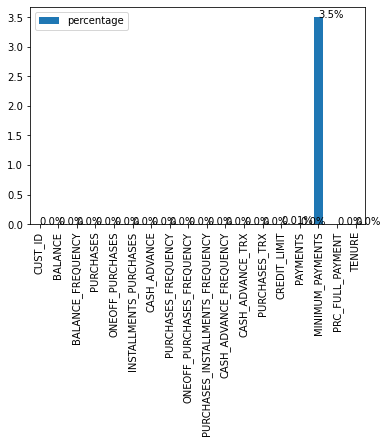

In [11]:
barchart=missing_df.plot.bar(y= 'percentage')
for index, percentage in enumerate(missing_percentage):
    barchart.text(index,percentage, str(percentage)+"%")

In [12]:

# checking the value which is Null for Credit Limit
df[df['CREDIT_LIMIT'].isnull()]

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [13]:
# dropping off the missing value for Credit Limit

df = df.drop(5203)
# resetting the index after dropping the record:
df = df.reset_index(drop=True)

In [14]:
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

PAYMENTS  MINIMUM_PAYMENTS
3       0.000000               NaN
45      0.000000               NaN
47      0.000000               NaN
54    417.016763               NaN
55      0.000000               NaN
...          ...               ...
8918    0.000000               NaN
8928    0.000000               NaN
8934    0.000000               NaN
8943    0.000000               NaN
8945  275.861322               NaN

[313 rows x 2 columns]

- It is pretty obvious that customers who haven't done any payments wouldn't have minimum payments also
- Hence, if PAYMENTS = 0, MINIMUM_PAYMENTS = 0

In [15]:
# Looking at PAYMENTS that's above MINIMUM_PAYMENTS

print('Shape:', df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] > df['MINIMUM_PAYMENTS'])].shape)
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] > df['MINIMUM_PAYMENTS'])].head()

Shape: (6272, 2)


PAYMENTS  MINIMUM_PAYMENTS
0   201.802084        139.509787
1  4103.032597       1072.340217
4   678.334763        244.791237
6  6354.314328        198.065894
7   679.065082        532.033990

In [16]:
# Looking at PAYMENTS that's below MINIMUM_PAYMENTS

print('Shape:', df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])].shape)
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])].head()

Shape: (2364, 2)


PAYMENTS  MINIMUM_PAYMENTS
2    622.066742        627.284787
5   1400.057770       2407.246035
10  1083.301007       2172.697765
14   805.647974        989.962866
15  1993.439277       2109.906490

- Logically, payments should be done if PAYMENTS above MINIMUM_PAYMENTS. Which is true for 6272 customers.
- But on the other hand, we got 2364 customers who did the PAYMENTS below MINIMUM_PAYMENTS which lead to invalid values. But we would like to leave it that way.
- Hence, we fill the missing values by the mean of PAYMENTS
- if PAYMENTS is less than MINIMUM_PAYMENTS, the missing values will be filled by the correspond PAYMENTS

In [17]:
minpay = df['MINIMUM_PAYMENTS'].copy() # make a copy of MINIMUM_PAYMENTS
payments_mean = np.mean(df['PAYMENTS']) # take the mean value of PAYMENTS

i = 0
for payments, minpayments in zip(df['PAYMENTS'], df['MINIMUM_PAYMENTS'].isna()):
    if (payments == 0) and (minpayments == True):
        minpay[i] = 0
    elif (0 < payments < payments_mean) and (minpayments == True): 
        minpay[i] = payments
    elif minpayments == True: 

        minpay[i] = payments_mean
    i += 1
    
df['MINIMUM_PAYMENTS'] = minpay.copy()


In [18]:
# Now again check the missing values.

df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [19]:
#lets see if we have any duplicated entries and the result shows that all entries are unique
df.duplicated().sum()

0

In [20]:
#drop the CUST_ID column which doesn't provide any info .
df.drop(columns='CUST_ID' , axis=1 , inplace=True)

In [21]:
print('Number of columns={}'.format(len(df.columns)))

Number of columns=17


#### Monthly_avg_purchase

In [22]:
df['Monthly_avg_purchase']=df['PURCHASES']/df['TENURE']

In [23]:
print(df['Monthly_avg_purchase'].head(),'\n ',
df['TENURE'].head(),'\n', df['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64 
  0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


#### Monthly_cash_advance Amount

In [24]:
df['Monthly_cash_advance']=df['CASH_ADVANCE']/df['TENURE']

In [25]:
df[df['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4301

# EDA

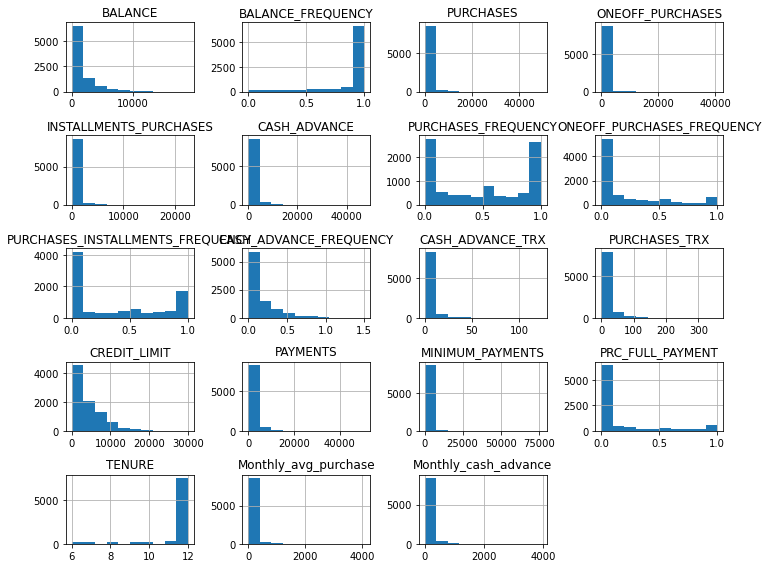

In [27]:
df.hist(figsize=(10,8))
plt.tight_layout()

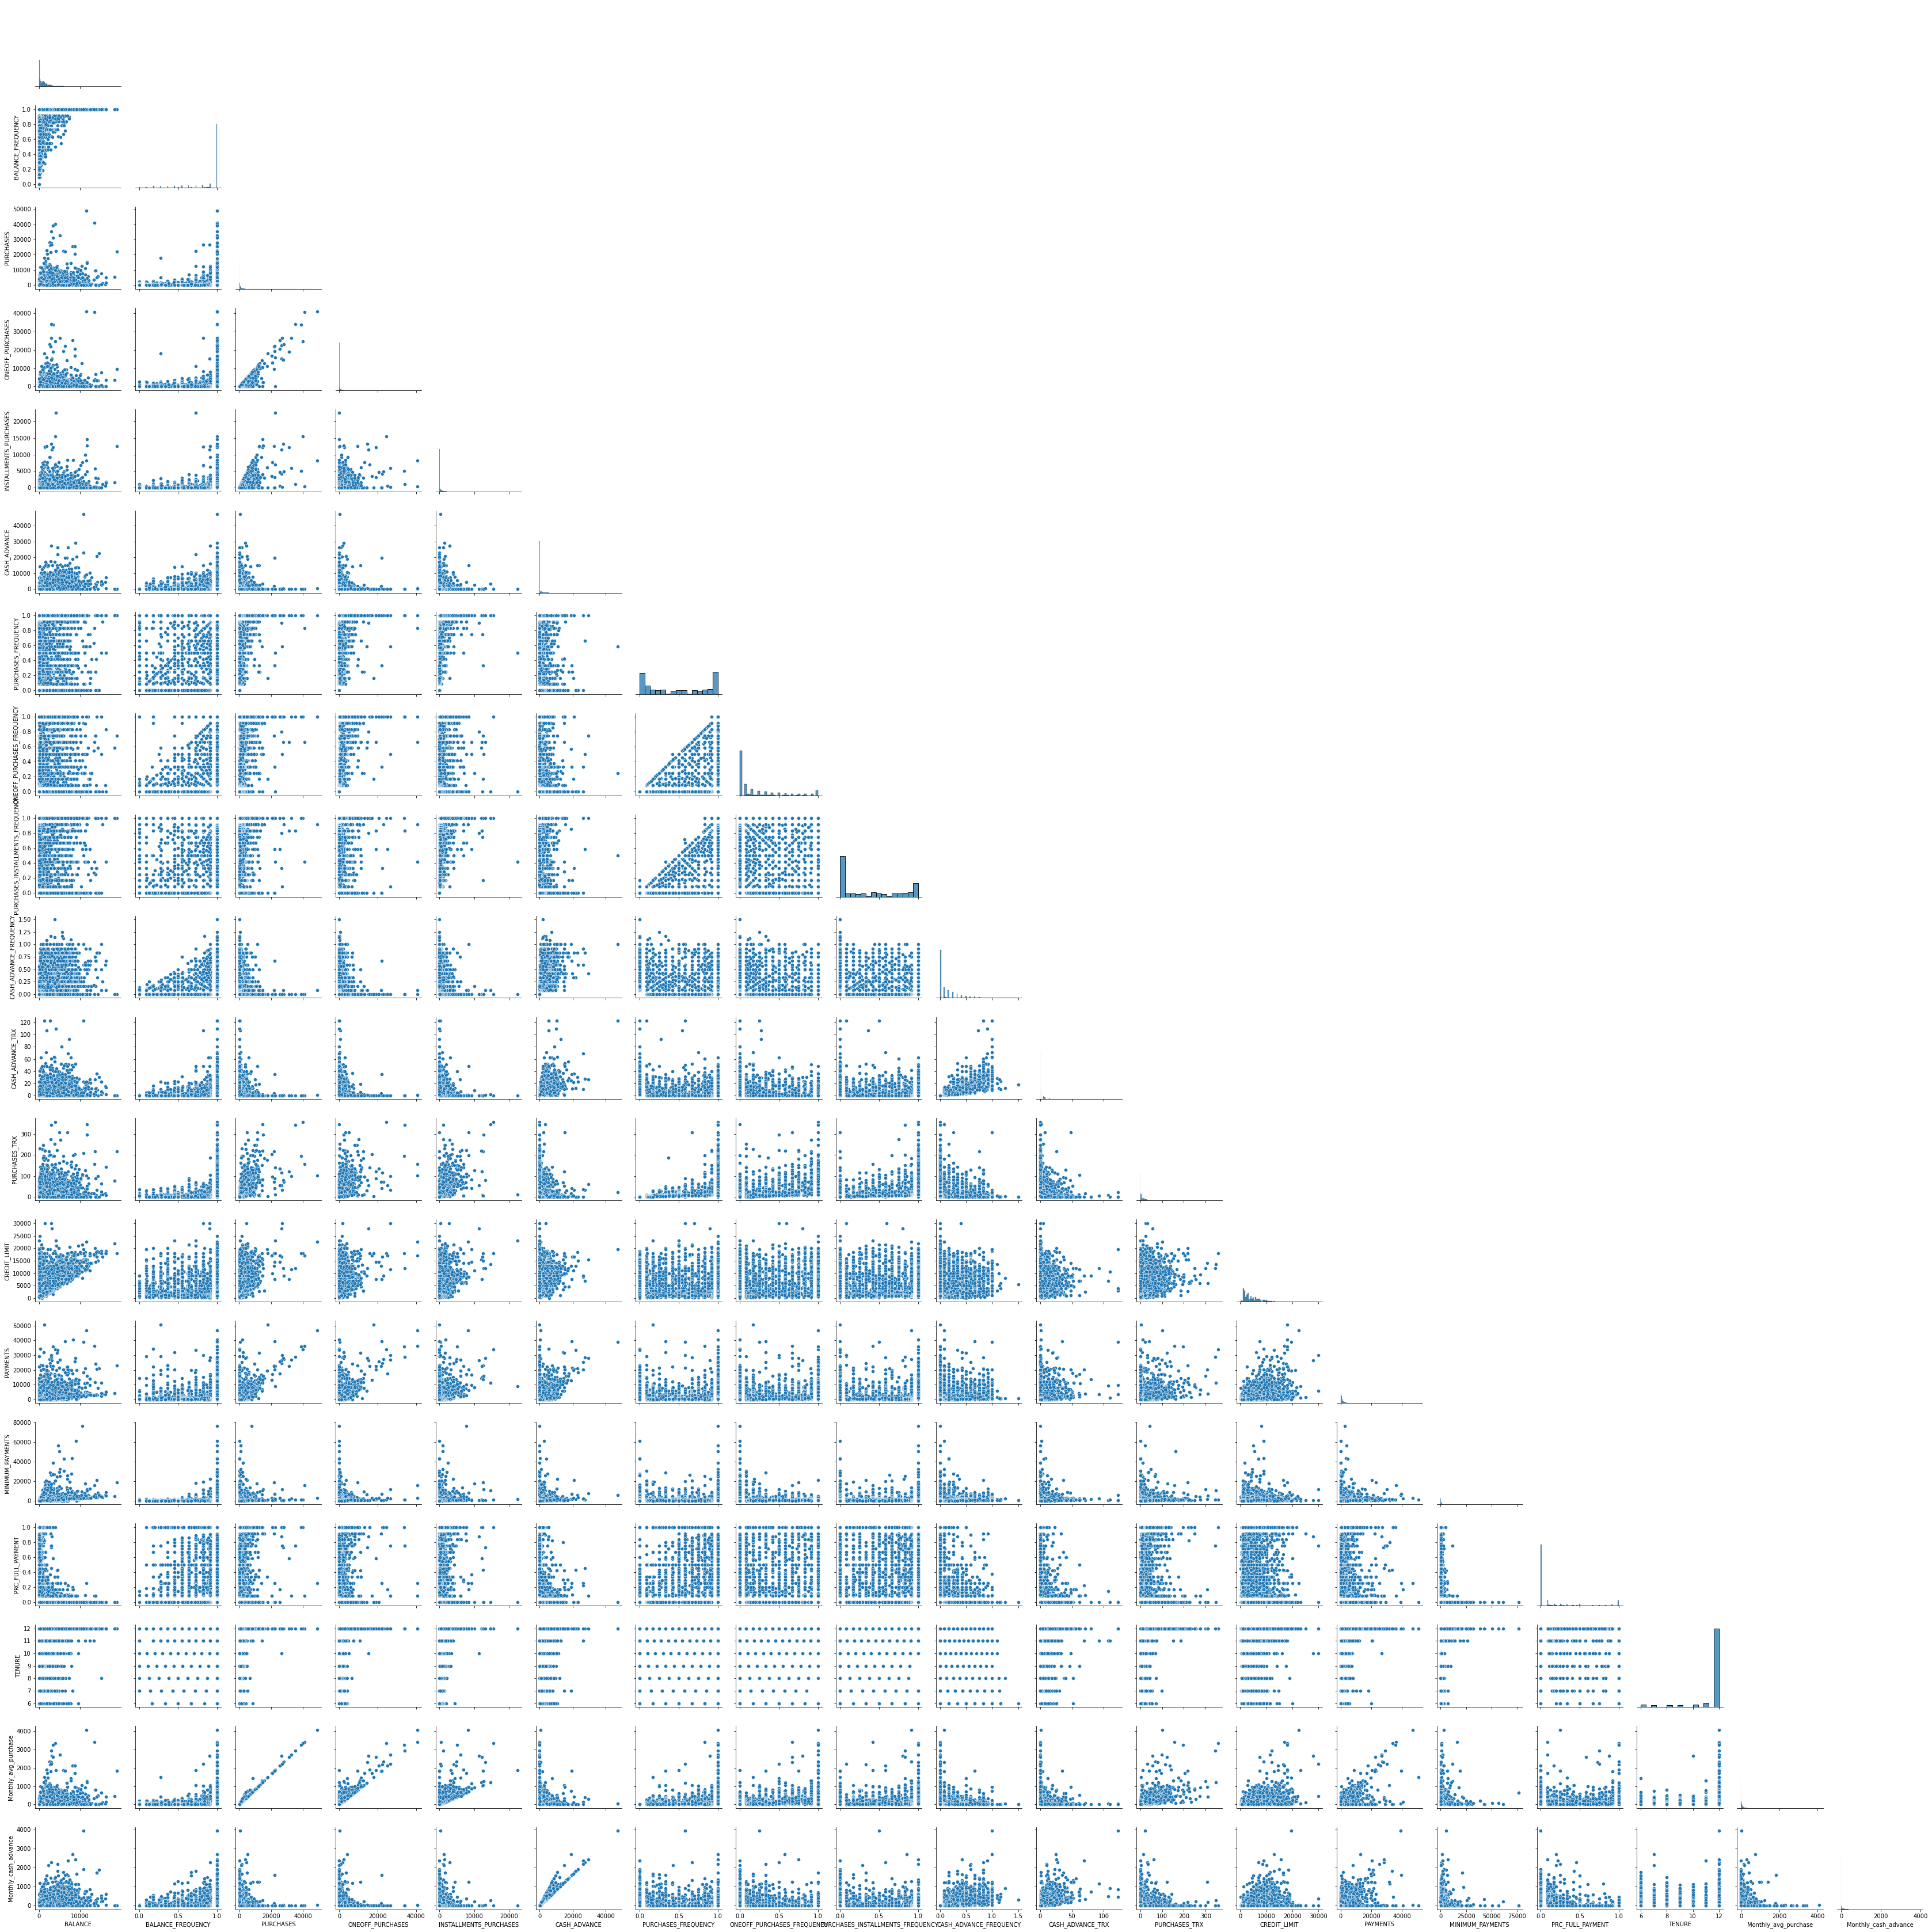

In [28]:
sns.pairplot(df,corner=True)

Observation:
- 1- As the credit limit increase, the balance also increases hence a linear relationship
- 2- As the number of purchases increases, the number of "cash in advance" transactions decreases
- 3- As the credit balance is low, the purchases, oneoffpurchases and installments purchases are less. Thus validating our assumption from univariate analysis
- 4- Purchases, oneoffpurchases and installment purchases are all related linearly
- 5- As the credit balance is low, the "cash in advance" transactions are less

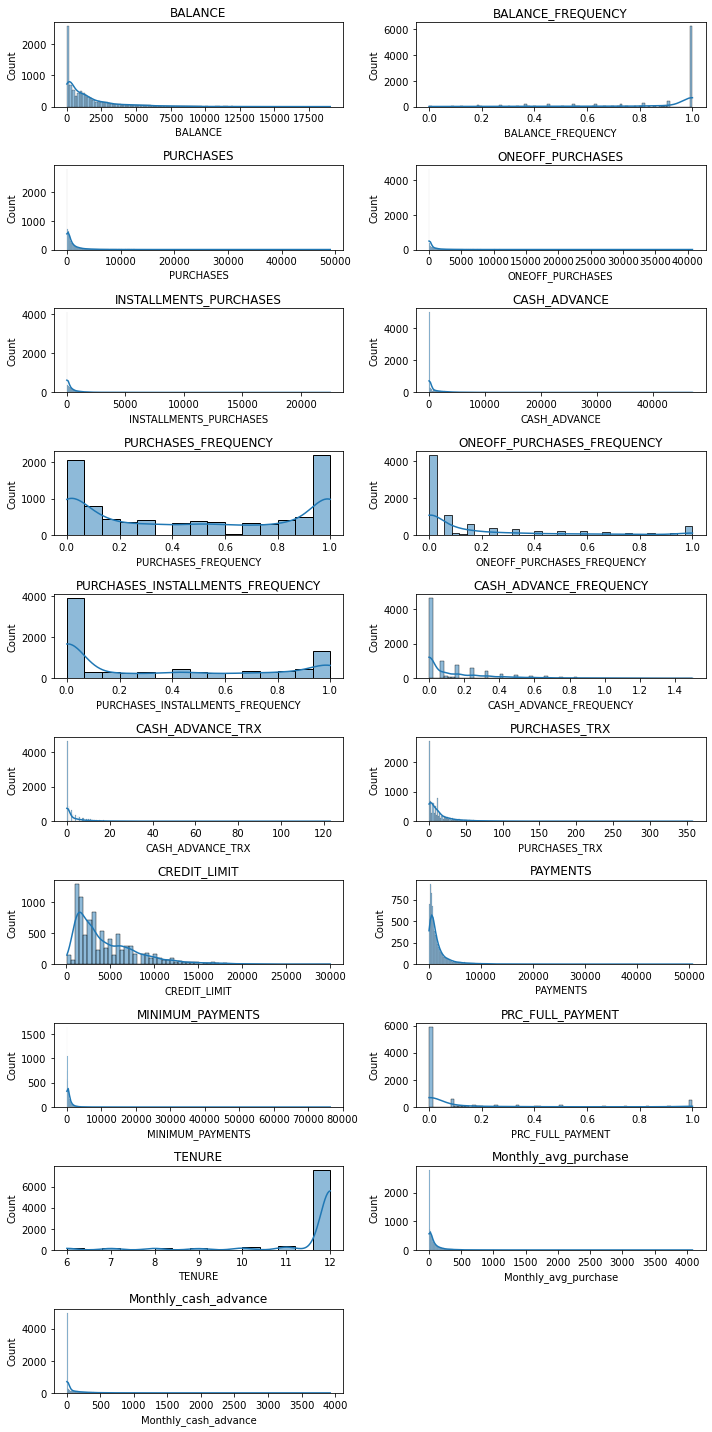

In [29]:
#we are going to use dist_plot which is a combination of "hist" function in matplotlib and "KDE" in seaborn
palette_color=sns.color_palette('bright')
plt.figure(figsize=(10,20))
for i in range (len(df.columns)):
    plt.subplot(10,2,i+1)
    sns.histplot(df[df.columns[i]] ,kde=True)
    plt.title(df.columns[i])
    plt.tight_layout()

Observation:
- 1- Most credit card holders have low credit limit and maintain credit balance below 7500
- 2- Variable such as Purchases, OneOffPurchases, installmentpurchases and cash advances also follow the same trend as     credit balance. They could all be related. That is as the credit balance is low, the purchases are also low and so on
- 3- Most people either don't purchase anything or they purchase very frequently
- 4- People who purchase in installments is more than people who purchase in one-go
- 5- In the last 6 months, most people have made total payments below 10000, with the minimum payments below 5000
- 6- Finally, most of the credit card holders own a card for more than 12 months


# Correlation

<AxesSubplot:>

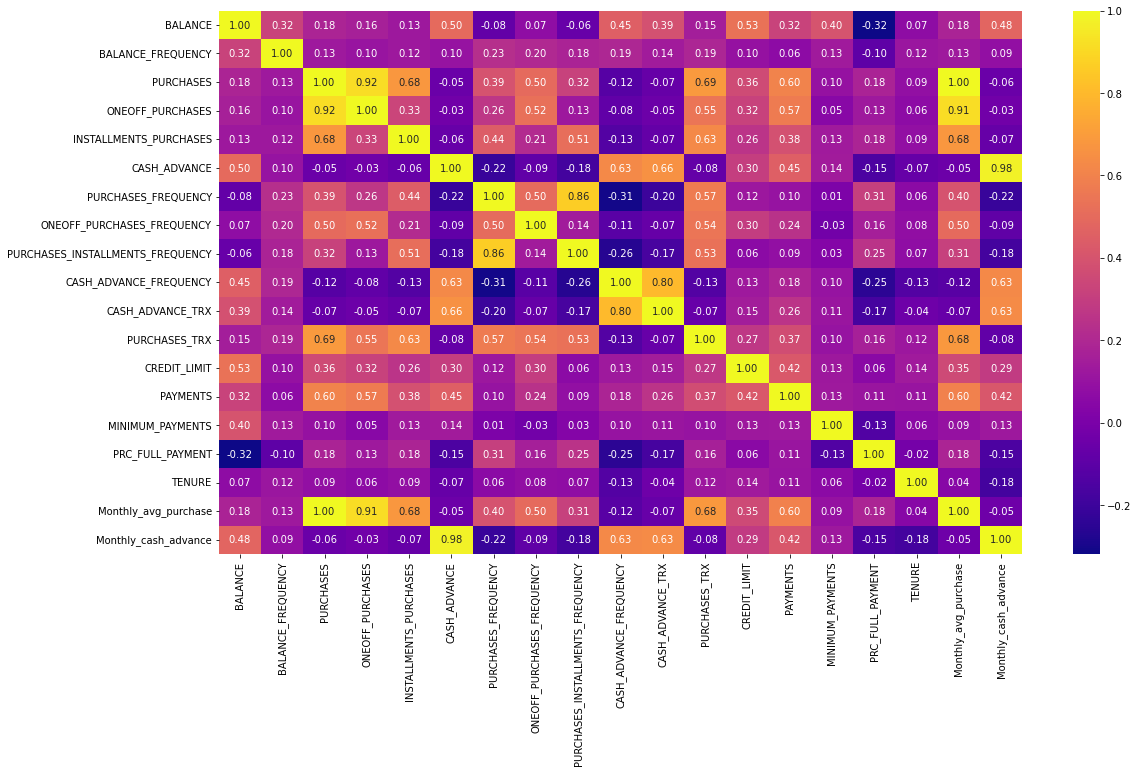

In [30]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), cmap= 'plasma',annot = True , fmt='.2f' )

Balance has a higher level of correlation with Cash Advance, Cash Advance Frequency and Credit Limit. Payments variable has a high correletion with Purchases and one off Purchases. Tenure has a negative correlation with Cash Advance and Cash Advance Frequency variables.
"PURACHASES_INSTALLMENTS_FREQUENCY" has strong positive correlation with "PURCHASE FREQUENCY",
            "BALANCE" has a strong negative correlation with "PRC_FULL_PAYMENT",
            "TENURE" has almost no correlation with any (No linear relationship)

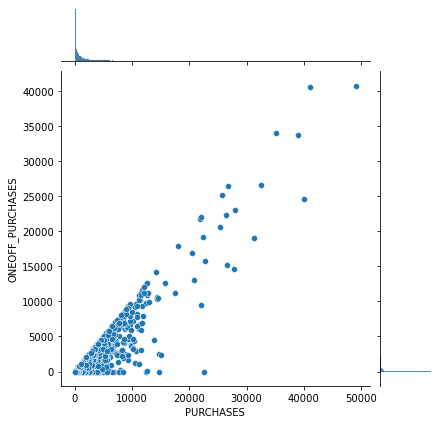

In [31]:
sns.jointplot(x='PURCHASES' , y='ONEOFF_PURCHASES', data=df)
plt.show()

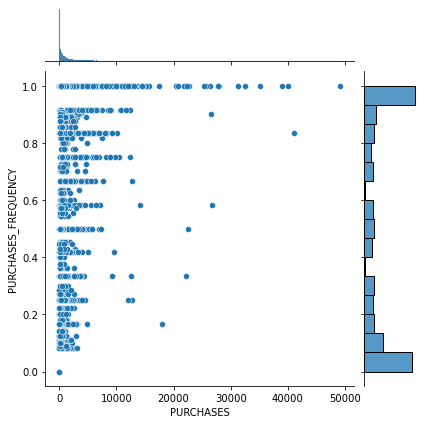

In [32]:
sns.jointplot(x='PURCHASES', y='PURCHASES_FREQUENCY', data=df)

Customers with more range of frequency have higher amount of purchases

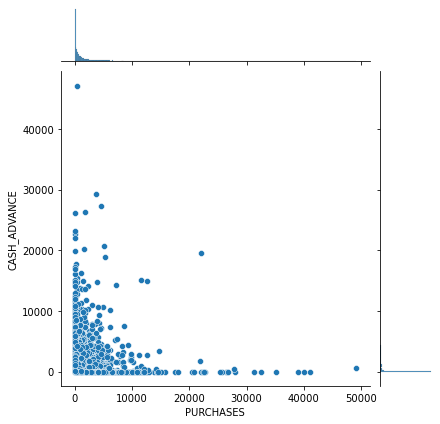

In [33]:
sns.jointplot(x='PURCHASES', y='CASH_ADVANCE', data=df)

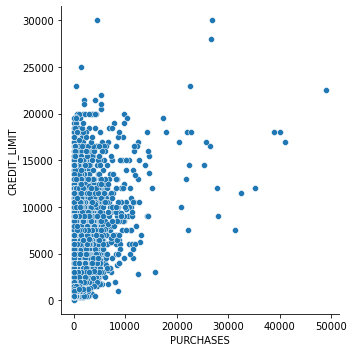

In [34]:
sns.relplot(x='PURCHASES',y='CREDIT_LIMIT',data=df)

- high purchases in the range 0-10000
- Credit limit more in the range 0-20000

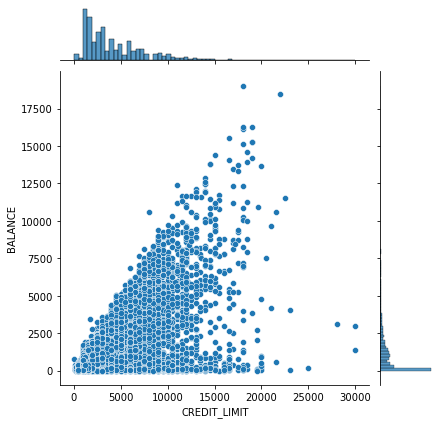

In [35]:
sns.jointplot(x='CREDIT_LIMIT', y='BALANCE', data=df)

- CREDIT_LIMIT & BALANCE are in a linear relation with each other ie. if a customer's balance increases, his/her credit limit shall increase
- Most customers lie in and under 15000 credit limit and 10K balance
others can be considered as premium customers

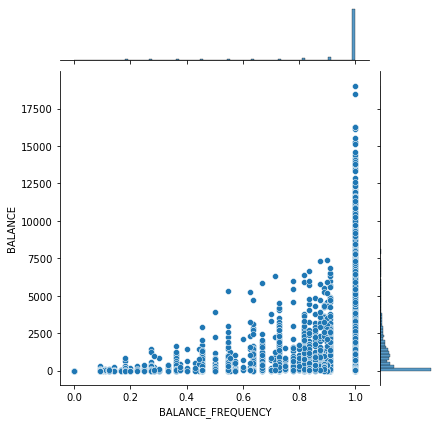

In [36]:
sns.jointplot(x='BALANCE_FREQUENCY', y='BALANCE', data=df)

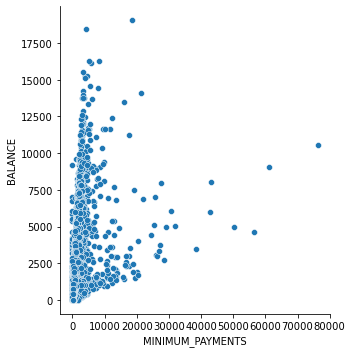

In [37]:
sns.relplot(x='MINIMUM_PAYMENTS',y='BALANCE',data=df)

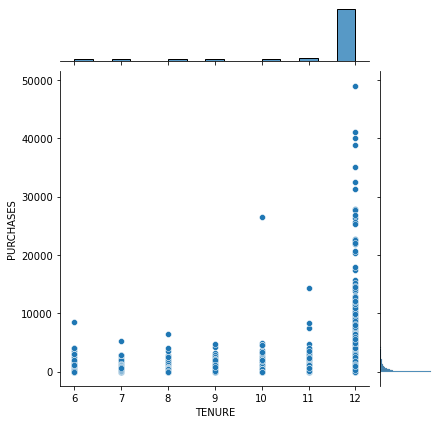

In [38]:
sns.jointplot(x='TENURE', y='PURCHASES', data=df)

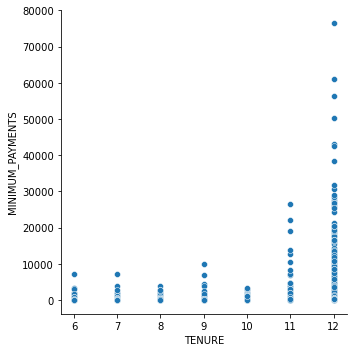

In [43]:
sns.relplot(x='TENURE',y='MINIMUM_PAYMENTS',data=df)

 More the tenure more is minimum payment

In [44]:
plt.figure(figsize=(10,5))
px.scatter(df, x='TENURE', y='CREDIT_LIMIT', color='TENURE')

<Figure size 720x360 with 0 Axes>

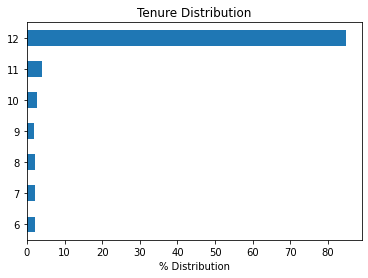

In [46]:
(1e2*df['TENURE'].value_counts().sort_index()/len(df)).plot(kind='barh')
plt.title('Tenure Distribution')
plt.xlabel('% Distribution');

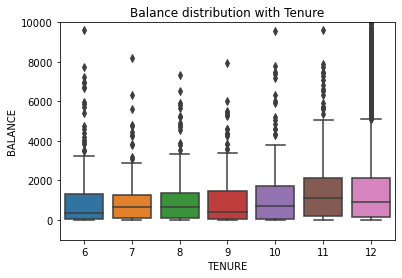

In [47]:
sns.boxplot(x="TENURE", y="BALANCE", data=df)
plt.ylim(-10**3, 10**4)
plt.title('Balance distribution with Tenure');

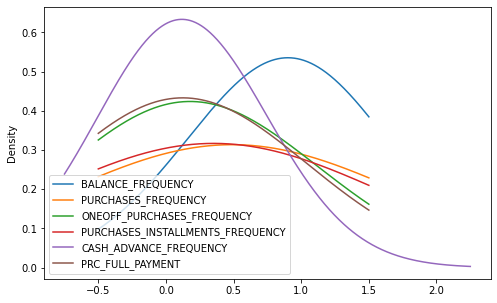

In [48]:
ax = df[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
         'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']].plot.kde(figsize=(8,5), bw_method=3) #,ind=[0, 2, 3,4]

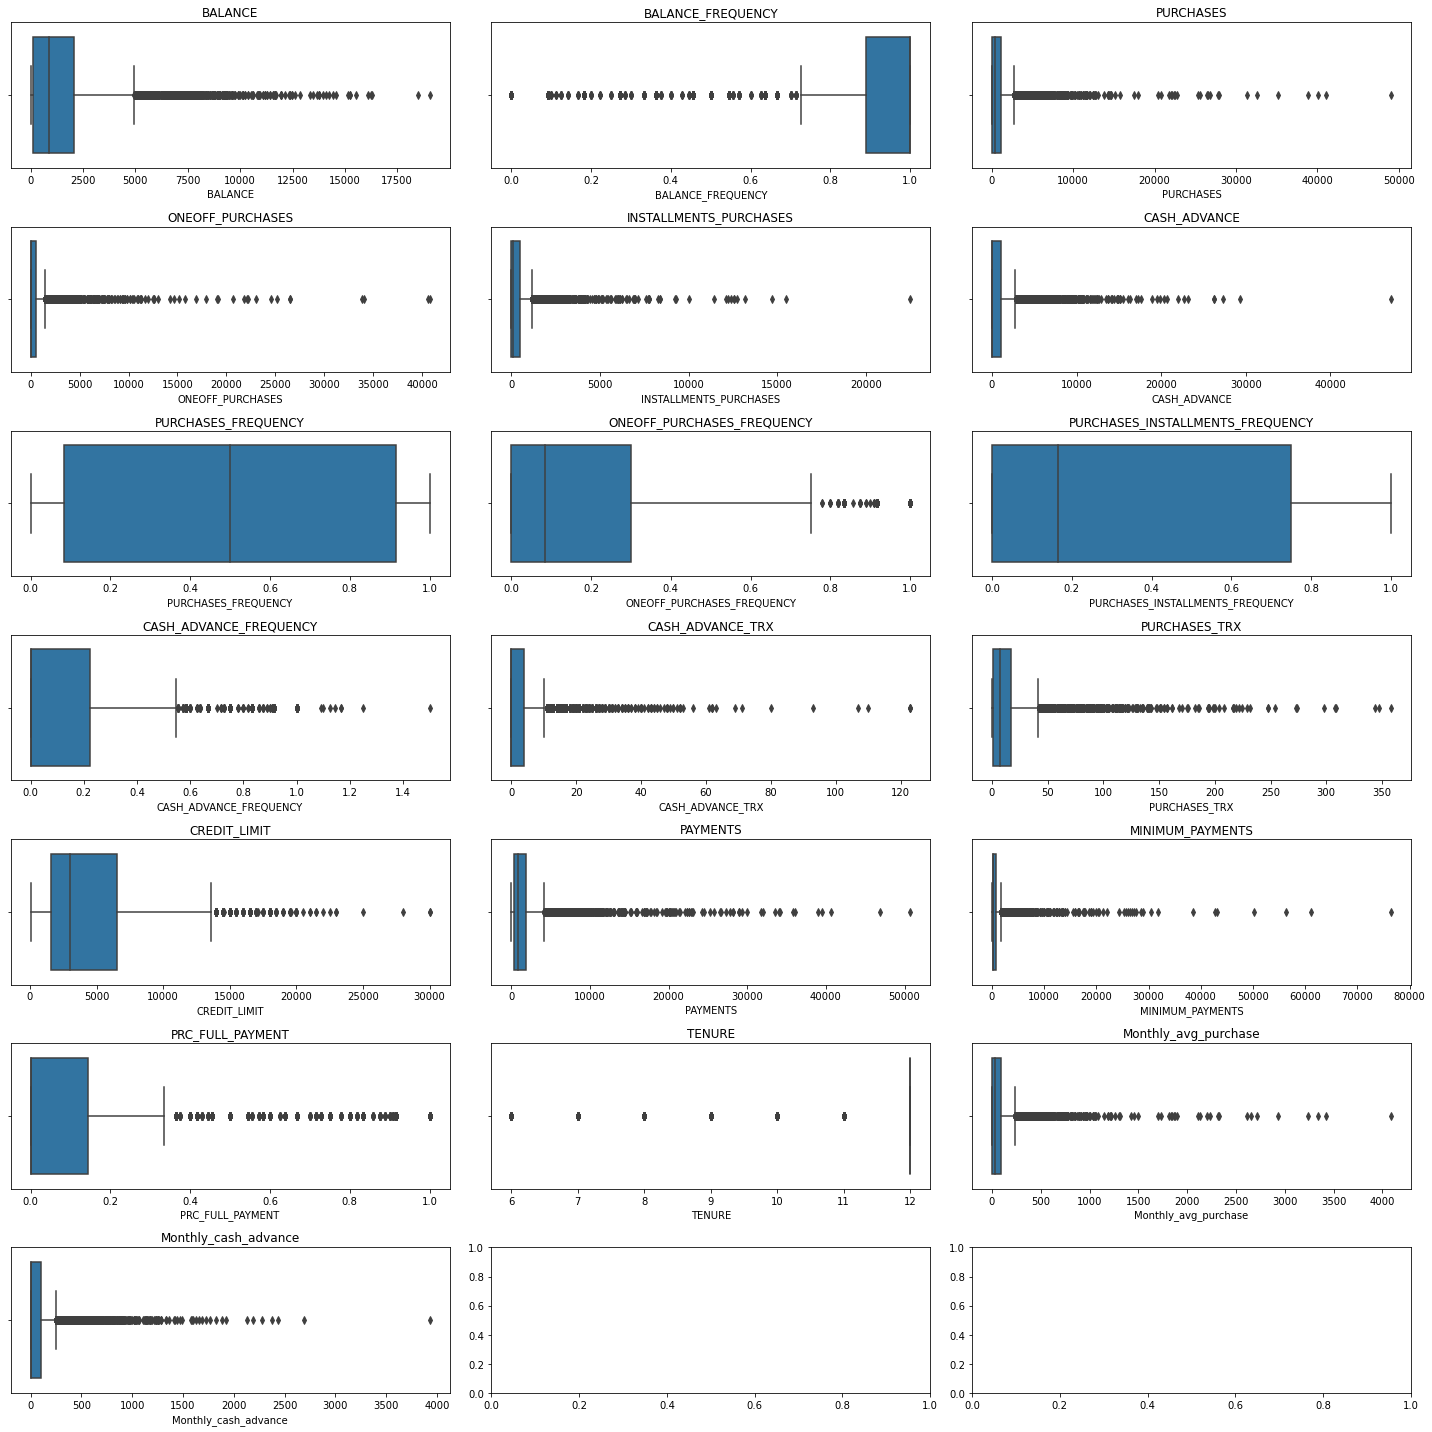

In [49]:
fig= plt.subplots(nrows=7 , ncols=3 , figsize=(20,20))
for i in range (len(df.columns)):
    plt.subplot(7,3,i+1)
    ax=  sns.boxplot(df[df.columns[i]])
    plt.title(df.columns[i])
    plt.tight_layout()


####  Isolation Forest

Isolation Forest(IF) is similar to Random Forest and it is build based on decision trees. There are no pre-defined labels here. It's an unsupervised learning algorithm that identifies anomaly by isolating outliers in the data.


Isolation Forest does not assume normal distribution and is able to detect outliers at a multi-dimensional level. Isolation Forest is computationally efficient: the algorithm has a linear time complexity with a low constant and a low memory requirement. Therefore, it scales well to large data sets.

In [50]:
from sklearn.ensemble import IsolationForest
df1 = df.copy()

In [51]:
# Model building
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df1)

IsolationForest(contamination=0.1, n_estimators=150)

In [52]:
# Adding 'scores' and 'anomaly' colums to df
scores=model.decision_function(df1)
anomaly=model.predict(df1)

df1['scores']=scores
df1['anomaly']=anomaly

anomaly = df1.loc[df1['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 895


In [53]:
anomaly

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
6       627.260806           1.000000    7091.01           6402.63   
21     6369.531318           1.000000    6359.95           5910.04   
23     3800.151377           0.818182    4248.35           3454.56   
30    12136.219960           1.000000    3038.01           1013.20   
34     3517.101616           0.727273     547.28              0.00   
...            ...                ...        ...               ...   
8913    181.891981           0.500000       0.00              0.00   
8914    381.341657           1.000000      78.00              0.00   
8922    486.661842           0.833333    1898.88            939.09   
8940   5967.475270           0.833333     214.55              0.00   
8948    372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
6                     688.38      0.000000             1.000000   
21                    449.91    229.028245             1.000000   
23                    793.79   7974.415626             1.000000   
30                   2024.81   3183.583301             1.000000   
34                    547.28      0.000000             1.000000   
...                      ...           ...                  ...   
8913                    0.00   1865.191764             0.000000   
8914                   78.00    934.808869             1.000000   
8922                  959.79      0.000000             0.833333   
8940                  214.55   8555.409326             0.833333   
8948                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
6                       1.000000                          1.000000   
21                      0.916667                          1.000000   
23                      0.083333                          0.916667   
30                      0.166667                          1.000000   
34                      0.000000                          1.000000   
...                          ...                               ...   
8913                    0.000000                          0.000000   
8914                    0.000000                          0.833333   
8922                    0.666667                          0.666667   
8940                    0.000000                          0.666667   
8948                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
6                   0.000000                 0             64       13500.0   
21                  0.333333                 6             92       11250.0   
23                  0.333333                13             13        9000.0   
30                  0.500000                10             64       13000.0   
34                  0.000000                 0             14       11000.0   
...                      ...               ...            ...           ...   
8913                0.500000                10              0        2000.0   
8914                0.666667                16              6        1000.0   
8922                0.000000                 0             24        1200.0   
8940                0.666667                13              5        9000.0   
8948                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
6     6354.314328        198.065894               1.0      12   
21    2077.959051       1659.775075               0.0      12   
23    9479.043842       1425.426525               0.0      12   
30    4230.323491       3292.015030               0.0      12   
34    8735.607835      17862.558310               0.0      12   
...           ...               ...               ...     ...   
8913  4565.356495         88.057892               1.0       6   
8914   143.118373         85.152441               0.0  

In [54]:
df1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8944    28.493517           1.000000     291.12              0.00   
8945    19.183215           1.000000     300.00              0.00   
8946    23.398673           0.833333     144.40              0.00   
8947    13.457564           0.833333       0.00              0.00   
8948   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8944                  291.12      0.000000             1.000000   
8945                  300.00      0.000000             1.000000   
8946                  144.40      0.000000             0.833333   
8947                    0.00     36.558778             0.000000   
8948                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8944                    0.000000                          0.833333   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.666667   
8947                    0.000000                          0.000000   
8948                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8944                0.000000                 0              6        1000.0   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              5        1000.0   
8947                0.166667                 2              0         500.0   
8948                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0      201.802084        139.509787          0.000000      12   
1     4103.032597       1072.340217          0.222222      12   
2      622.066742        627.284787          0.000000      12   
3        0.000000          0.000000          0.000000      12   
4      678.334763        244.791237          0.000000      12   
...           ...               ...               ...     ...   
8944   325.594462         48.886365          0.500000       6   
8945   275.861322        275.861322          0.000000       6   
8

In [55]:
# dropping outliers
df1 = df1.drop(anomaly_index, axis = 0).reset_index(drop=True)

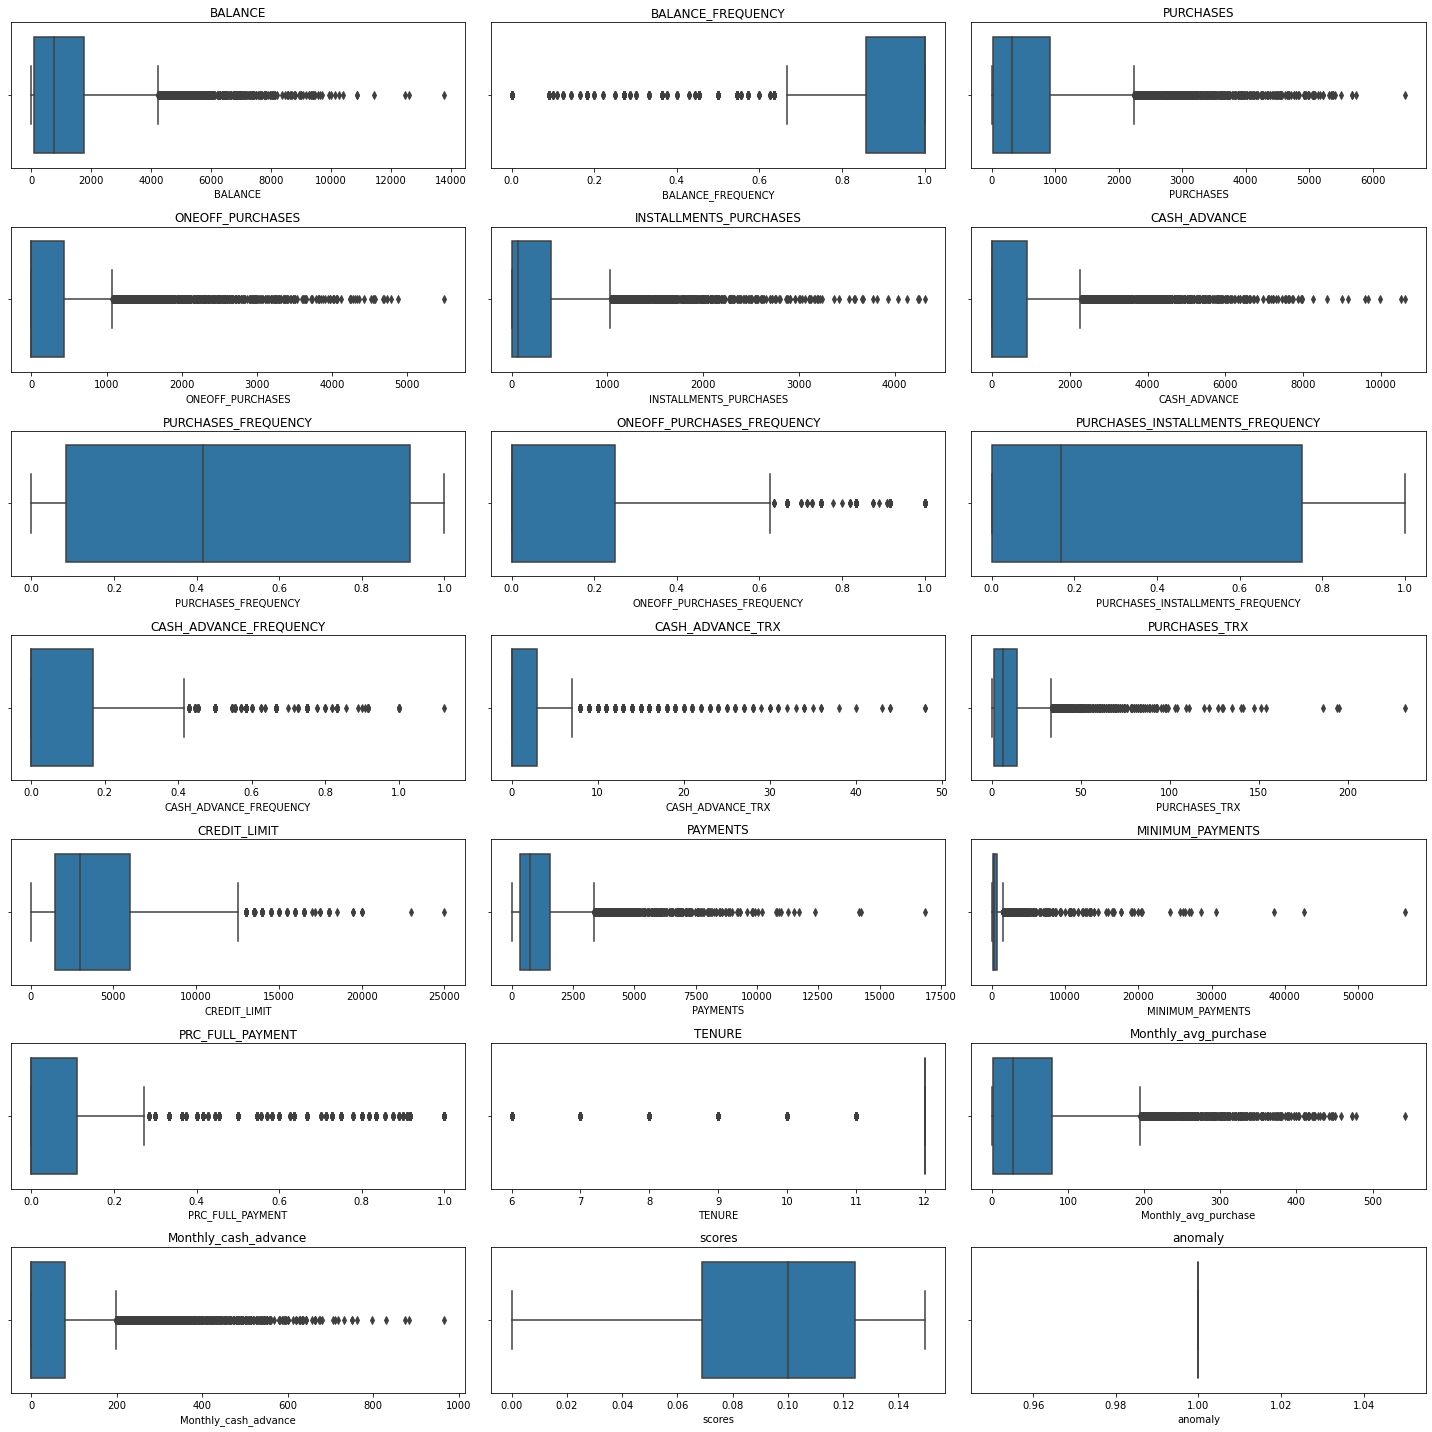

In [56]:
fig= plt.subplots(nrows=7 , ncols=3 , figsize=(20,20))
for i in range (len(df1.columns)):
    plt.subplot(7,3,i+1)
    ax=  sns.boxplot(df1[df1.columns[i]])
    plt.title(df1.columns[i])
    plt.tight_layout()

In [57]:
#drop the 'scores','anomaly' columns which doesn't provide any info .
df1.drop(columns='scores' , axis=1 , inplace=True)
df1.drop(columns='anomaly' , axis=1 , inplace=True)

>Scale The Data

In [58]:
scaler= StandardScaler()
scaled_features=scaler.fit_transform(df1)
scaled_df=pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)
scaled_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.763442          -0.215833  -0.628782         -0.537957   
1     1.172634           0.157625  -0.734956         -0.537957   
2     0.739487           0.531084   0.125525          0.630504   
3     0.232145          -0.962751   0.933319          1.727421   
4    -0.287738           0.531084  -0.717149         -0.513777   
...        ...                ...        ...               ...   
8049 -0.669950          -0.153592   0.392137          0.992541   
8050 -0.771040           0.531084  -0.410961         -0.537957   
8051 -0.776742           0.531084  -0.401078         -0.537957   
8052 -0.774160          -0.153592  -0.574249         -0.537957   
8053 -0.780248          -0.153592  -0.734956         -0.537957   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.412853     -0.541684            -0.758091   
1                  -0.601066      4.535574            -1.177415   
2                  -0.601066     -0.541684             1.338524   
3                  -0.601066     -0.379517            -0.967754   
4                  -0.601066     -0.541684            -0.967754   
...                      ...           ...                  ...   
8049               -0.601066     -0.541684            -0.338769   
8050               -0.026721     -0.541684             1.338524   
8051               -0.009202     -0.541684             1.338524   
8052               -0.316182     -0.541684             0.919200   
8053               -0.601066     -0.512875            -1.177415   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.634516                         -0.675452   
1                      -0.634516                         -0.888153   
2                       3.039187                         -0.888153   
3                      -0.328375                         -0.888153   
4                      -0.328375                         -0.888153   
...                          ...                               ...   
8049                    0.590051                         -0.888153   
8050                   -0.634516                          1.238857   
8051                   -0.634516                          1.238857   
8052                   -0.634516                          0.813457   
8053                   -0.634516                         -0.888153   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.670217         -0.545267      -0.585719     -0.960937   
1                   0.780895          0.339508      -0.712226      0.962911   
2                  -0.670217         -0.545267       0.046816      1.123232   
3                  -0.186515         -0.324073      -0.648972      1.123232   
4                  -0.670217         -0.545267      -0.648972     -0.896809   
...                      ...               ...            ...           ...   
8049               -0.670217         -0.545267      -0.585719      0.000987   
8050               -0.670217         -0.545267      -0.332705     -0.960937   
8051               -0.670217         -0.545267      -0.332705     -0.960937   
8052               -0.670217         -0.545267      -0.395958     -0.960937   
8053                0.297193         -0.102880      -0.712226     -1.121258   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  \
0    -0.732082         -0.310623         -0.511843  0.351403   
1     2.108427          0.214158          0.278097  0.351403   
2    -0.426085         -0.036216         -0.511843  0.351403   
3    -0.879016         -0.389107         -0.511843  0.351403   
4    -0.385116         -0.251395         -0.511843  0.351403   
...        ...               ...               ...       ...   
8049 -0.879016         -0.389107         -0.511843 -4.359050   
8050 -0.641948         -0.361605          1.265524 -4.359050   
8051 -0.678159         -0.233916         -0

In [59]:
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}

In [60]:
cluster_range = range( 1, 21 )
cluster_errors=[]
for k in cluster_range:
    kmeans= KMeans(n_clusters=k, **kmeans_set) #** open dictionry
    kmeans.fit(scaled_features)
    cluster_errors.append( kmeans.inertia_) 

In [61]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

#clusters_df[0:21]
clusters_df.head(10)

num_clusters  cluster_errors
0             1   153026.000000
1             2   122349.595774
2             3   101435.525709
3             4    90895.575747
4             5    84837.776226
5             6    79394.986034
6             7    74690.035104
7             8    70061.130019
8             9    66699.943269
9            10    64681.583668

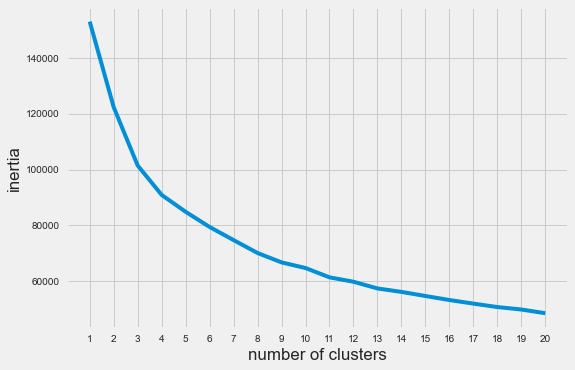

In [101]:

plt.plot(range(1,21),cluster_errors)
plt.xticks(range(1,21))
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

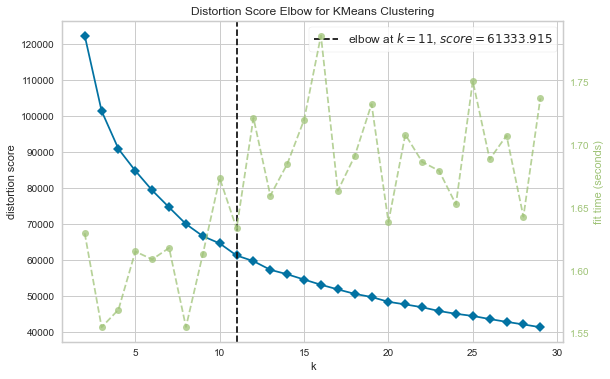

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_clusters=k, **kmeans_set)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(scaled_features)       
visualizer.show()       

In [64]:
# Now we are going to implement Elbow method to final optimal number of clusters
k1=KneeLocator(range(1,21),cluster_errors , curve='convex', direction= 'decreasing')
k1.elbow

5

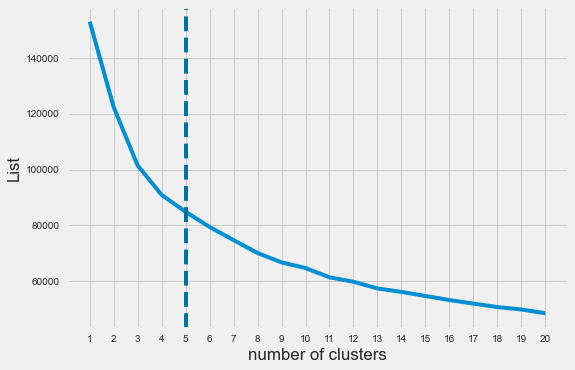

In [65]:

plt.plot(range(1,21),cluster_errors)
plt.xticks(range(1,21))
plt.xlabel('number of clusters')
plt.ylabel('List')
plt.axvline(x=k1.elbow, color='b', label= 'axvline-full height', ls= '--')
plt.show()

## Silhouette Coefficient Method:
 Average silhouette approach measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k.
 
 The silhouette score falls within the range [-1, 1].

 The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

- elbow method: k=5 , k=10 
- silhouette coefficiennt: k=3

In [66]:
silhouette_coefficients =[]
for k in range(2,21):#1 is the worse
    kmeans=KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_features)
    score= silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [67]:
silhouette_coefficients

[0.20562673943935167,
 0.2450667914743219,
 0.18768799943189307,
 0.1825909261403194,
 0.19124774283446955,
 0.19636948083453976,
 0.2067757686431651,
 0.20758713386863104,
 0.21001786854091445,
 0.18391201439115923,
 0.19481152595147416,
 0.19063048515781003,
 0.19003492598674412,
 0.17169674810020558,
 0.17469956364087297,
 0.1741314774070018,
 0.18005772019469413,
 0.1693753424834466,
 0.18475804899507078]

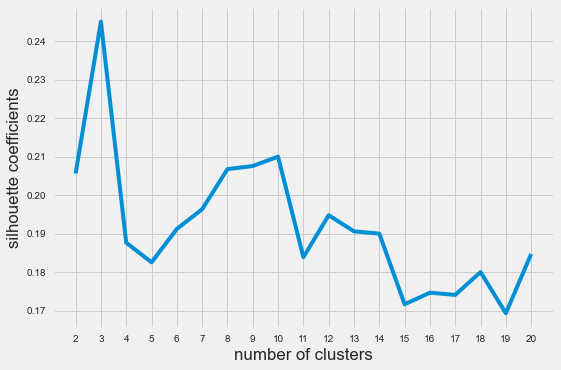

In [68]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,21),silhouette_coefficients)
plt.xticks(range(2,21))
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficients')
plt.show()

In [69]:
def evaluate_metrics(df1, min_clust=2, max_clust=10, rand_state=42):
    inertias = []
    silhouette = []
    ch_score = []
    db_score = []
    for n_clust in range(min_clust, max_clust):
        kmeans = KMeans(n_clusters=n_clust, random_state=rand_state)
        y_label = kmeans.fit_predict(scaled_features)
        inertias.append(kmeans.inertia_)
        silhouette.append(silhouette_score(scaled_features, y_label))
        ch_score.append(calinski_harabasz_score(scaled_features, y_label))
        db_score.append(davies_bouldin_score(scaled_features, y_label))        

    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    ax[0][0].plot(range(min_clust, max_clust), inertias, '-x', linewidth=2)
    ax[0][0].set_xlabel('#. of clusters')
    ax[0][0].set_ylabel('Inertia')
    
    ax[0][1].plot(range(min_clust, max_clust), silhouette, '-x', linewidth=2)
    ax[0][1].set_xlabel('#. of clusters')
    ax[0][1].set_ylabel('Silhouette Score')
    
    ax[1][0].plot(range(min_clust, max_clust), ch_score, '-x', linewidth=2)
    ax[1][0].set_xlabel('#. of clusters')
    ax[1][0].set_ylabel('Calinski Harabasz Score')
    
    ax[1][1].plot(range(min_clust, max_clust), db_score, '-x', linewidth=2)
    ax[1][1].set_xlabel('#. of clusters')
    ax[1][1].set_ylabel('Davies Bouldin Score')
    fig.suptitle('Metrics to evaluate the number of clusters')
    plt.show()

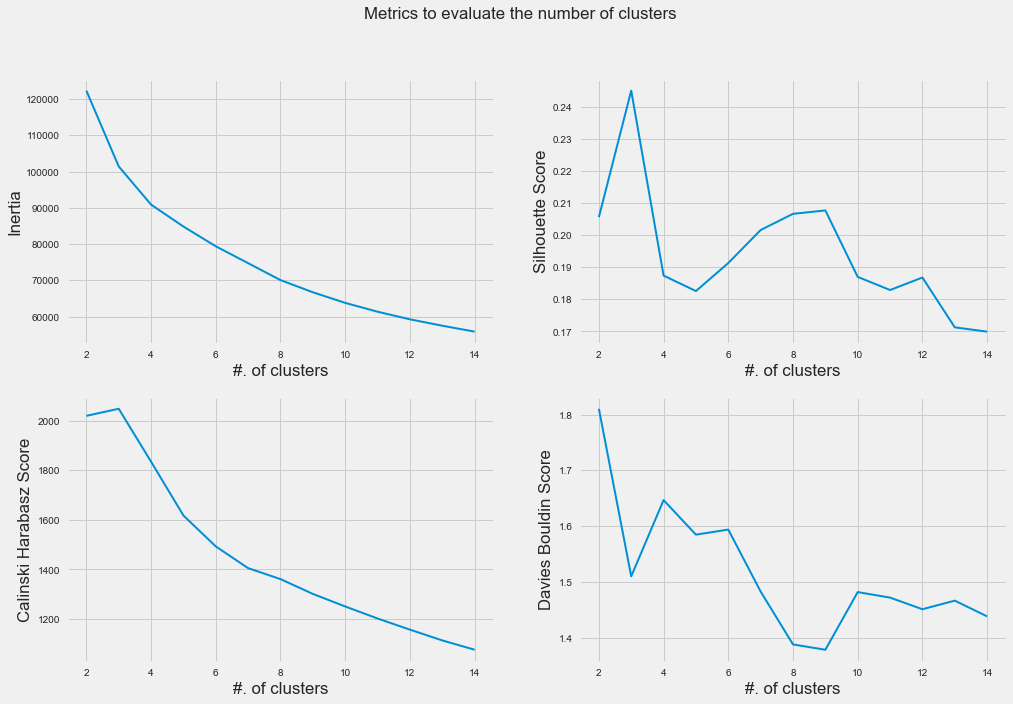

In [70]:
evaluate_metrics(scaled_features, min_clust=2, max_clust=15, rand_state=42)

So based on the plots above we conclude that 3 clusters are the best for k-mean modeling

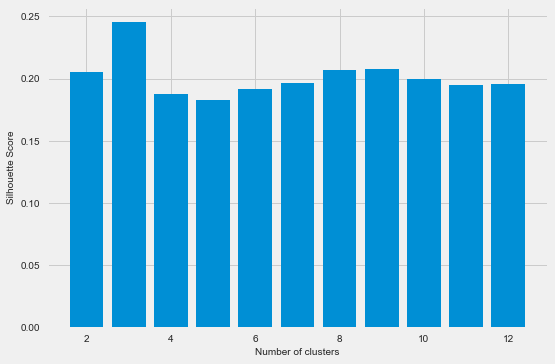

In [71]:
silhouette_scores = []

for n_cluster in range(2, 13):
    silhouette_scores.append( 
        silhouette_score(scaled_features, KMeans(n_clusters = n_cluster).fit_predict(scaled_features))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12] 

plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()
#confirming number of clusters

Note : Highest silhouette score is k = 3.

### K-Means Algorithm

In [72]:
# model with 3 clusters
kmeans_3=KMeans(n_clusters=3)
y_kmeans = kmeans_3.fit_predict(scaled_features)
y_kmeans


array([2, 1, 2, ..., 2, 2, 2])

In [73]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [df1.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  -0.084144          0.386827  1.907098         0.119642   
1  -0.097232          0.389855  0.266706         0.690757   
2  -0.745940          0.300643  0.083710        -0.465047   
3  -0.368811          0.333193 -0.100045        -0.404954   
4  -0.766835         -1.555915 -0.345259        -0.330958   
5   1.583865          0.221446 -0.604822        -0.416329   
6   0.956958          0.466027  0.407989         0.093004   
7   0.103939          0.019914 -0.048683         0.089750   
8   0.897979          0.425100 -0.575553        -0.384344   
9   0.197901          0.359655 -0.652549        -0.449909   
10 -0.126752         -0.398018 -0.637642        -0.439596   
11 -0.696524          0.329671  1.031266         1.291239   
12  0.164127          0.366619  1.642176         2.002013   
13  0.519616         -0.234778 -0.488433        -0.310503   
14  0.947494          0.504877 -0.342739        -0.482079   
15  0.312717          0.478221  3.559153         3.707157   
16  2.856346          0.527054 -0.544027        -0.360823   
17 -0.142438          0.417320 -0.562196        -0.367216   
18 -0.601308         -0.227942 -0.231616        -0.235371   
19 -0.750041         -2.340134 -0.472856        -0.327726   

   INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0                3.224033    -0.431695            1.208975   
1               -0.428224    -0.413849            0.609370   
2                0.755422    -0.537742            1.107400   
3                0.352461    -0.470919            1.035806   
4               -0.180479    -0.514303           -0.235946   
5               -0.529157     3.825599           -0.953842   
6                0.601340     0.905531            0.906593   
7               -0.203955    -0.439309           -0.209148   
8               -0.518713     1.506301           -0.760462   
9               -0.569926     0.485200           -1.014205   
10              -0.556963     0.711622           -0.922744   
11               0.141982    -0.523927            1.107073   
12               0.297309    -0.389929            0.826995   
13              -0.460986     1.957284           -0.874643   
14               0.021270    -0.019744           -0.163549   
15               1.469291    -0.455405            1.167901   
16              -0.493847     1.265112           -0.809678   
17              -0.517453    -0.394214           -0.809488   
18              -0.101624    -0.433328            0.623350   
19              -0.410136    -0.384960           -0.564955   

   ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.221966                         1.458805   
1                    1.770782                        -0.524574   
2                   -0.524689                         1.327117   
3                   -0.405884                         1.260014   
4                   -0.364375                        -0.175134   
5                   -0.460713                        -0.780991   
6                    0.185012                         0.923279   
7                   -0.050047                        -0.291357   
8                   -0.345036                        -0.655086   
9                   -0.496406                        -0.820590   
10                  -0.441042                        -0.777647   
11                   2.426620                         0.131354   
12                   1.466590                         0.446200   
13                  -0.431314                        -0.733821   
14                  -0.532469                         0.080706   
15                   2.076927                         0.973054   
16                  -0.398252                        -0.677775   
17                  -0.384592                        -0.693872   
18                  -0.192571                         0.492386   
19                  -0.428372                        -0.424107   

   CASH_ADVANCE_FREQUENCY CASH_AD

In [74]:
kmeans_3.labels_


array([2, 1, 2, ..., 2, 2, 2])

In [75]:
pd.Series(kmeans_3.labels_).value_counts()

2    4965
1    1566
0    1523
dtype: int64

In [76]:
df1['kmeans_3.labels_']=kmeans_3.labels_

In [77]:
# Create a list of all the features
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [78]:
# Plot the average feature value for each cluster
describe_clusters = scaled_df.groupby(df1['kmeans_3.labels_']).mean()
describe_clusters


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
kmeans_3.labels_                                                             
0                -0.002341           0.405677   1.659483          1.308129   
1                 1.093391           0.292926  -0.531367         -0.366840   
2                -0.344146          -0.216831  -0.341445         -0.285561   

                  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
kmeans_3.labels_                                                              
0                               1.233695     -0.396904             1.075182   
1                              -0.463505      1.567793            -0.768275   
2                              -0.232239     -0.372745            -0.087489   

                  ONEOFF_PURCHASES_FREQUENCY  \
kmeans_3.labels_                               
0                                   1.213479   
1                                  -0.390478   
2                                  -0.249072   

                  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
kmeans_3.labels_                                                             
0                                         0.832354               -0.442800   
1                                        -0.636074                1.470675   
2                                        -0.054700               -0.328035   

                  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
kmeans_3.labels_                                                            
0                        -0.393205       1.385770      0.512693  0.595891   
1                         1.418075      -0.515801      0.431502  0.521825   
2                        -0.326657      -0.262394     -0.293367 -0.347376   

                  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  \
kmeans_3.labels_                                                 
0                        -0.012531          0.352492  0.257585   
1                         0.338120         -0.415778 -0.097284   
2                        -0.102802          0.023014 -0.048330   

                  Monthly_avg_purchase  Monthly_cash_advance  
kmeans_3.labels_                                              
0                             1.640452             -0.403610  
1                            -0.536547              1.559576  
2                            -0.333973             -0.368096

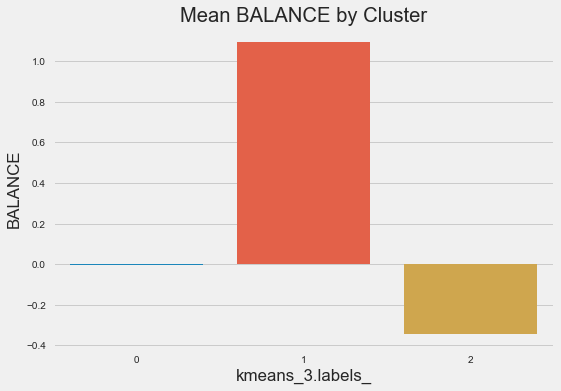

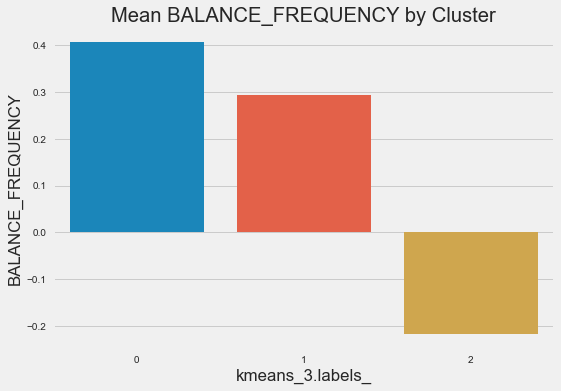

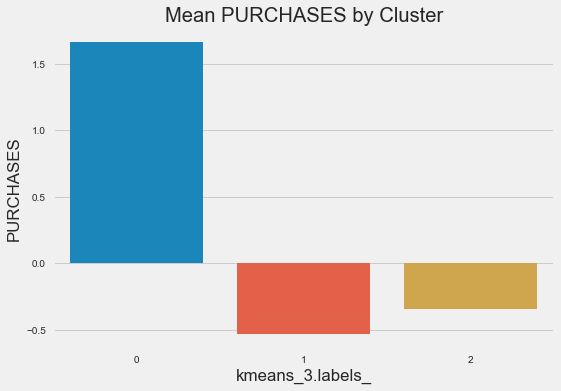

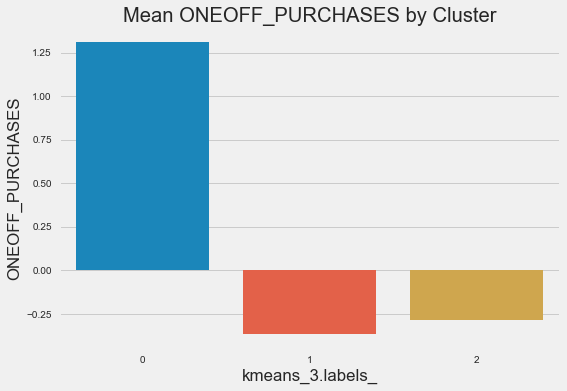

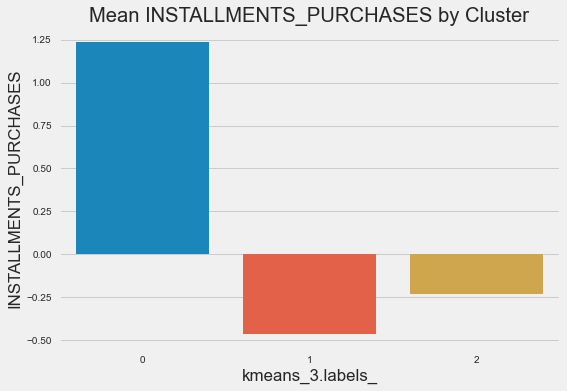

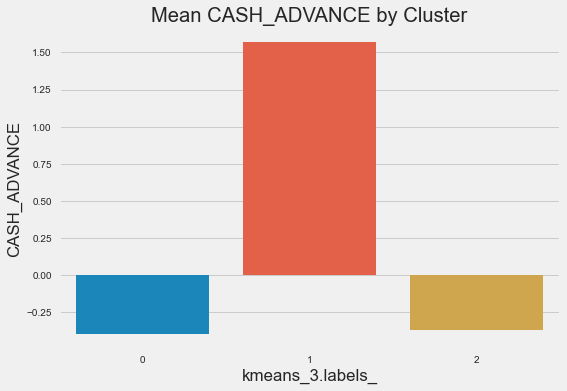

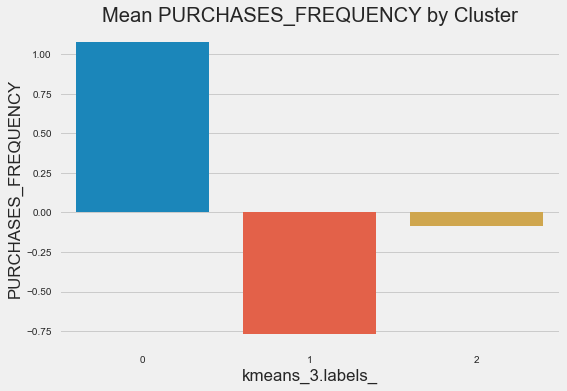

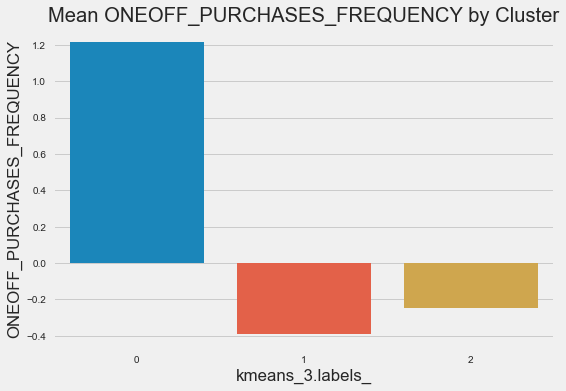

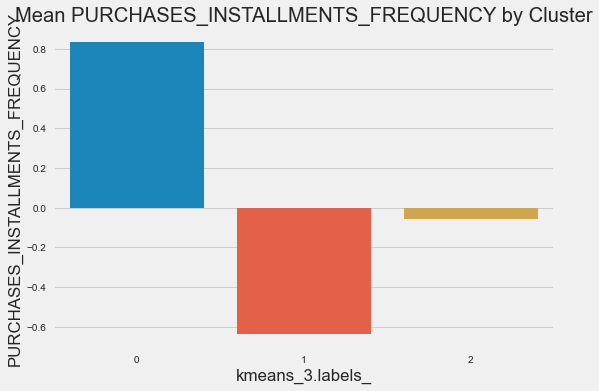

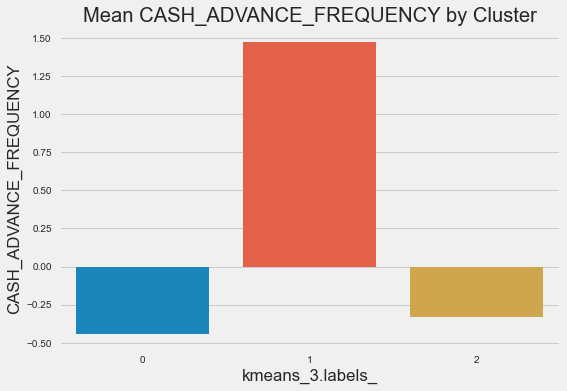

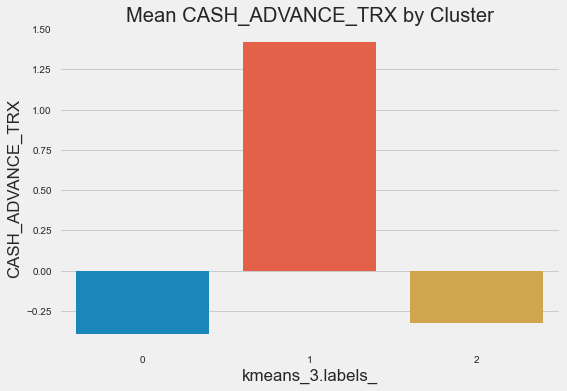

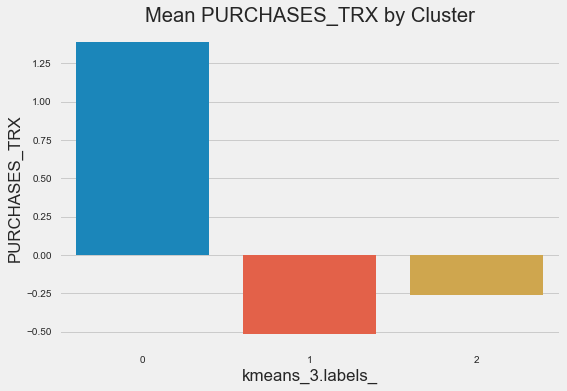

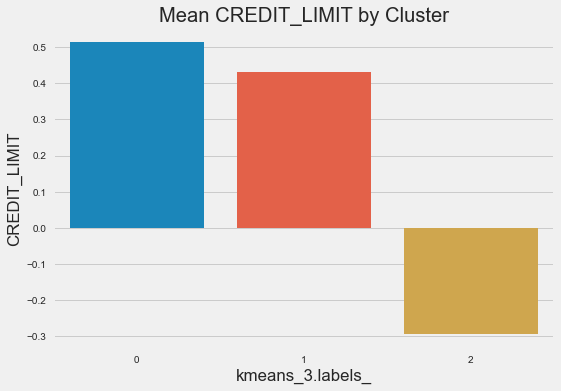

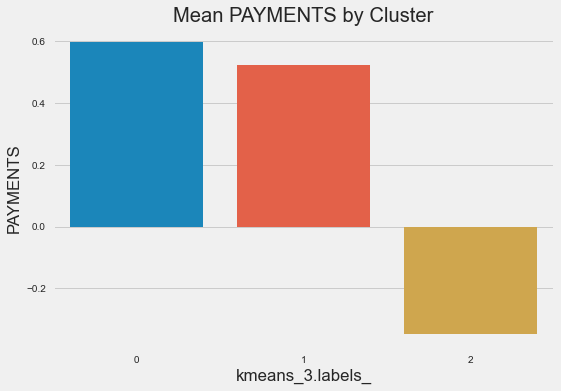

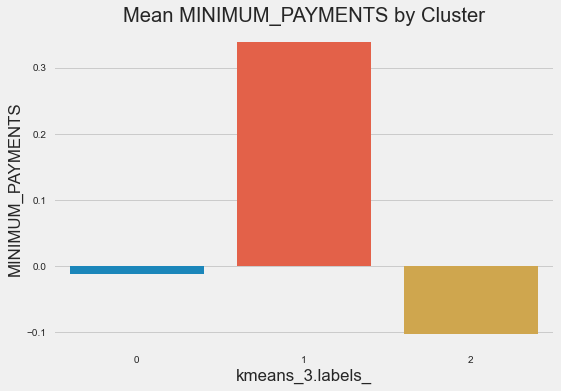

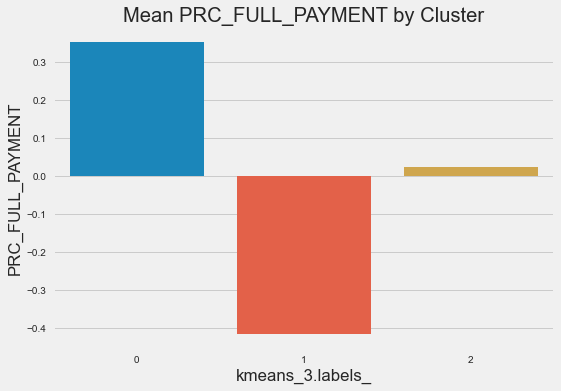

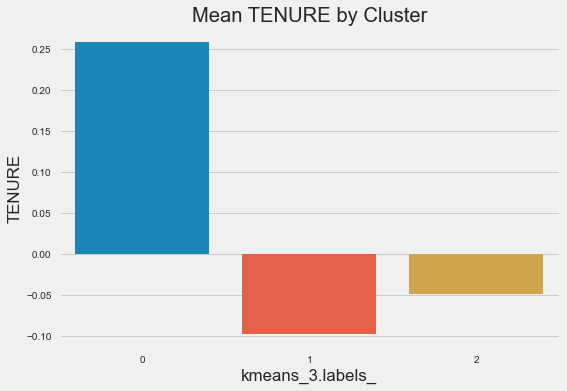

In [79]:
for i in features: 
    sns.barplot(x = describe_clusters.index
               , y = i
               , data = describe_clusters)
    plt.title('Mean ' + str(i) + ' by Cluster')
    plt.show()

In [80]:
df1.head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   
6  1823.652743           1.000000     436.20              0.00   
7  1014.926473           1.000000     861.49            661.49   
8   152.225975           0.545455    1281.60           1281.60   
9  1293.124939           1.000000     920.12              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  436.20      0.000000             1.000000   
7                  200.00      0.000000             0.333333   
8                    0.00      0.000000             0.166667   
9                  920.12      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    0.000000                          1.000000   
7                    0.083333                          0.250000   
8                    0.166667                          0.000000   
9                    0.000000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             12        2300.0   
7                0.000000                 0              5        7000.0   
8                0.000000                 0              3       11000.0   
9                0.000000                 0             12        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0   201.802084        139.509787          0.000000      12   
1  4103.032597       1072.340217          0.222222      12   
2   622.066742        627.284787          0.000000      12   
3     0.000000          0.000000          0.000000      12   
4   678.334763        244.791237          0.000000      12   
5  1400.057770       2407.246035          0.000000      12   
6   679.065082        532.033990          0.000000      12   
7   688.278568        311.963409          0.000000      12   
8  1164.770591        100.302262          0.000000      12   
9  1083.301007       2172.697765          0.000000      12   

   Monthly_avg_purchase  Monthly_cash_advance  kmeans_3.labels_  
0              7.950000              0.000000                 2  
1              0.000000            536.912124                 1  
2             64.430833              0.000000                 2  
3            124.916667             17.149001        

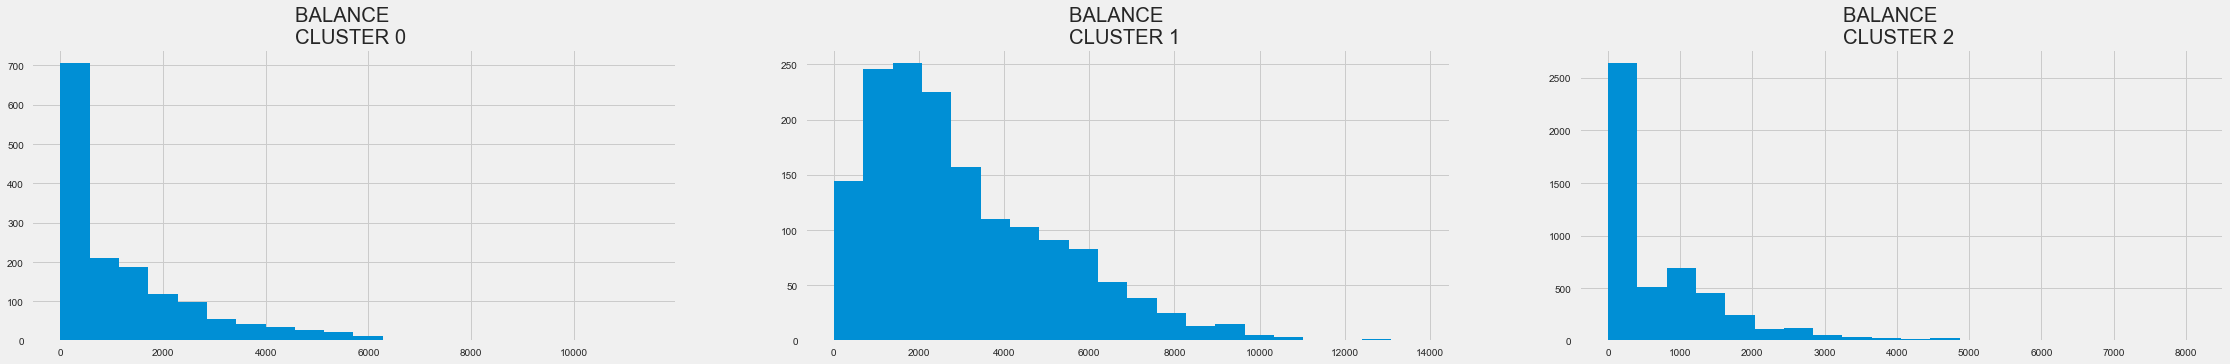

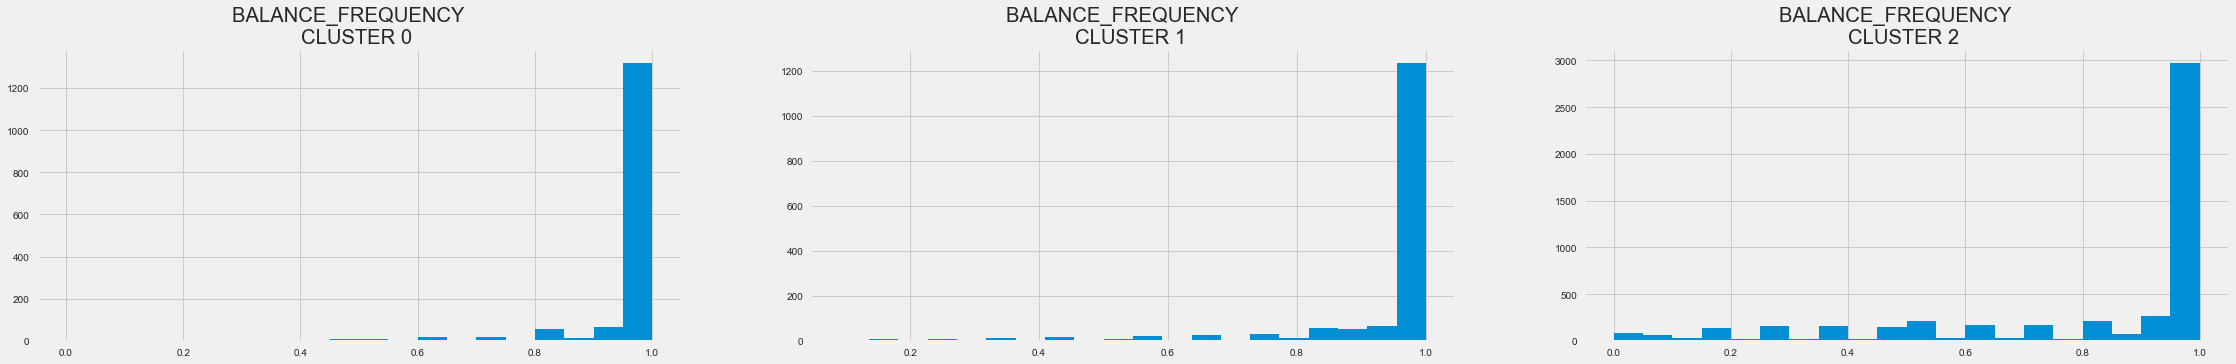

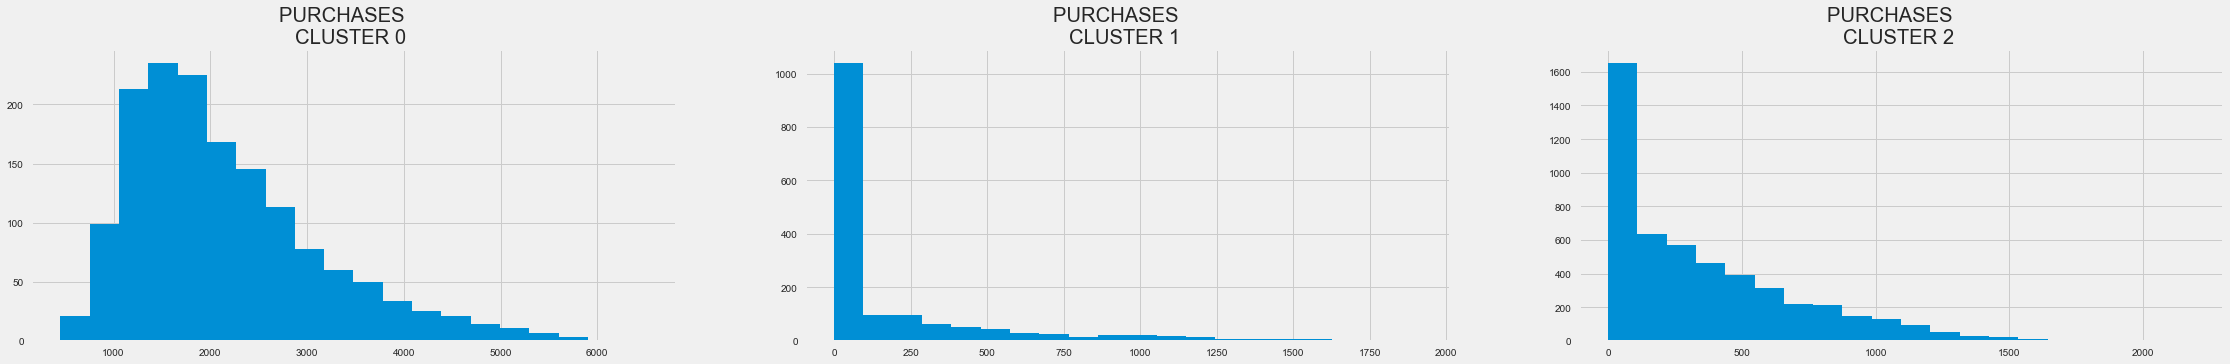

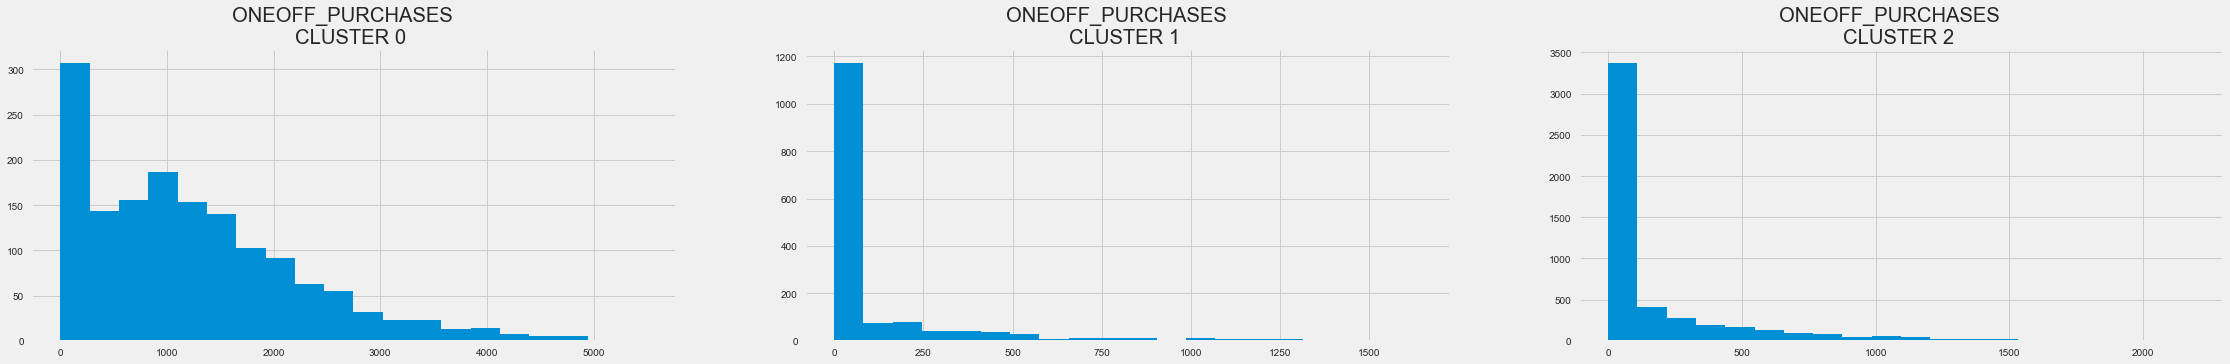

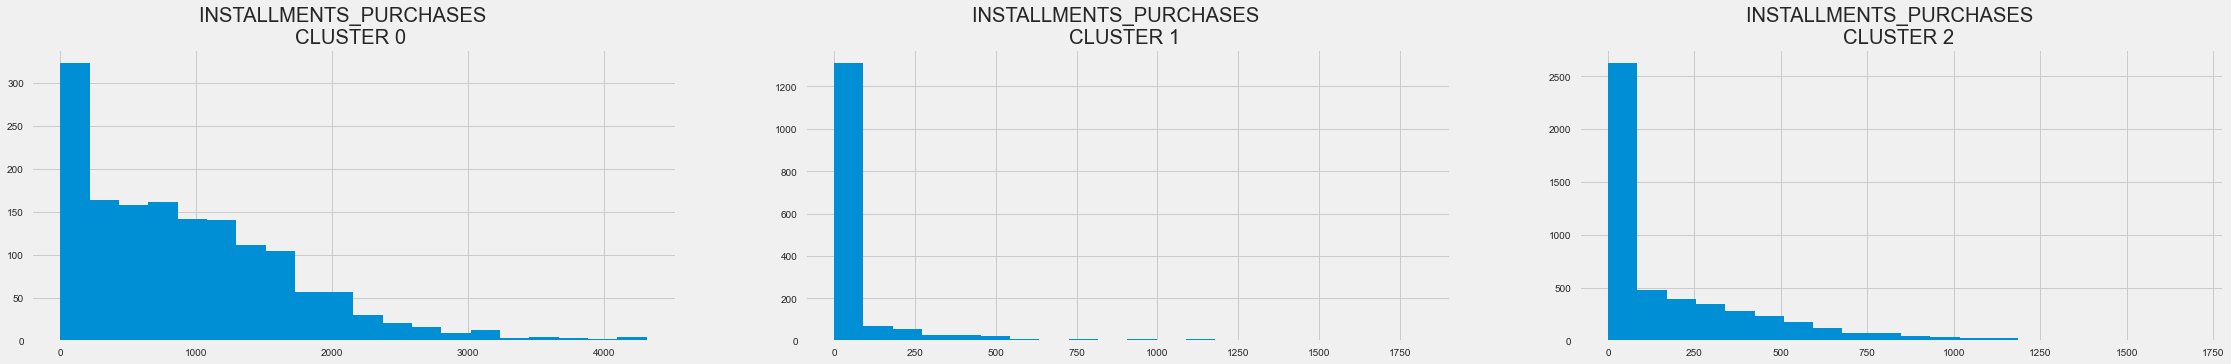

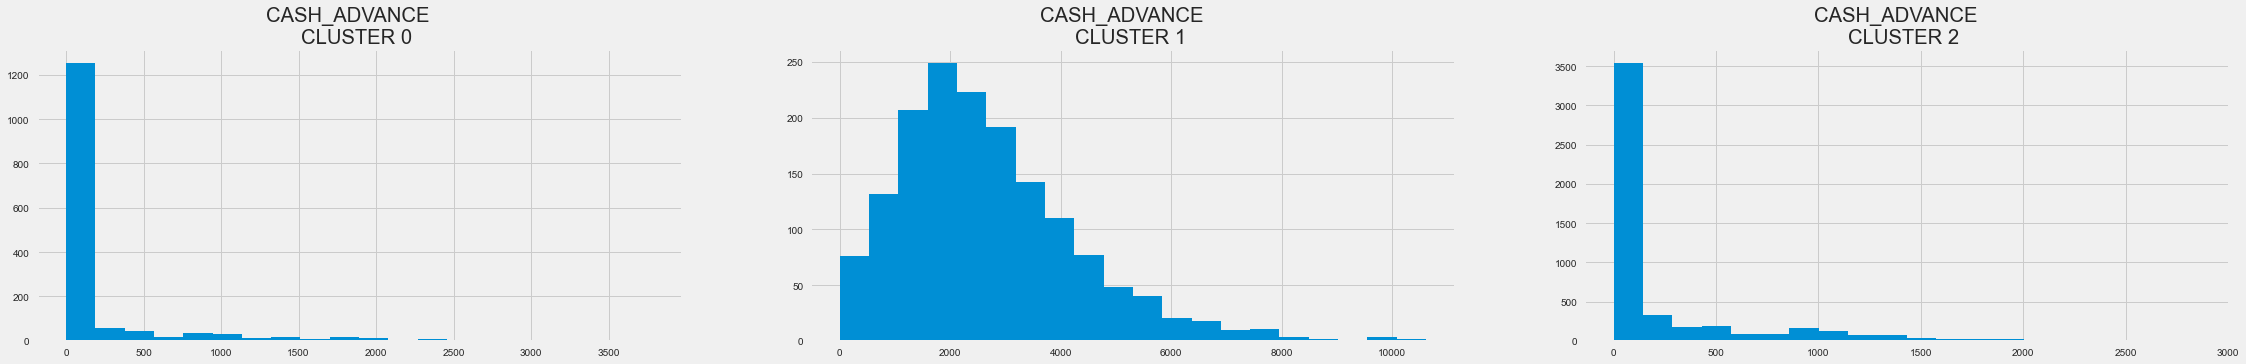

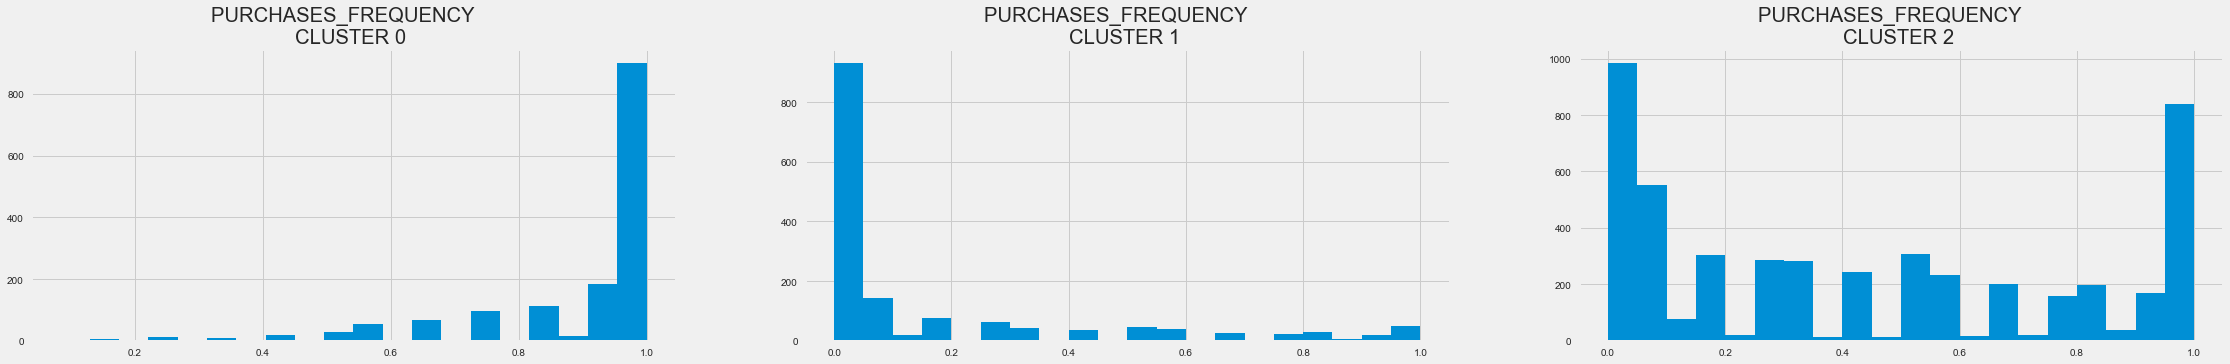

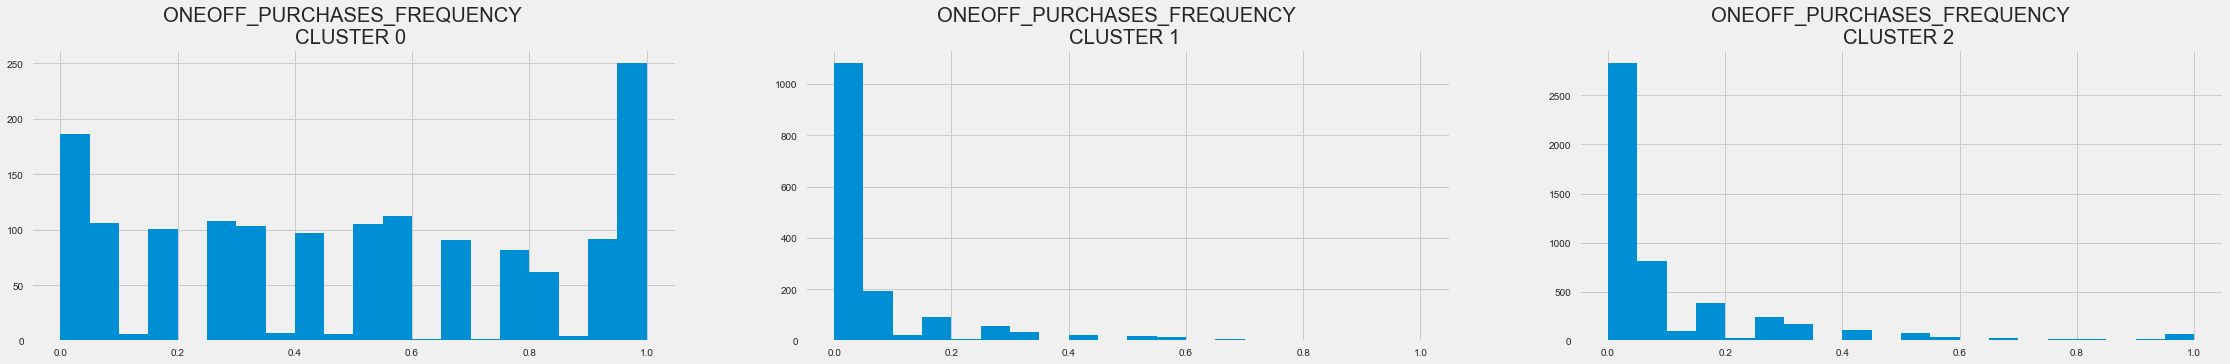

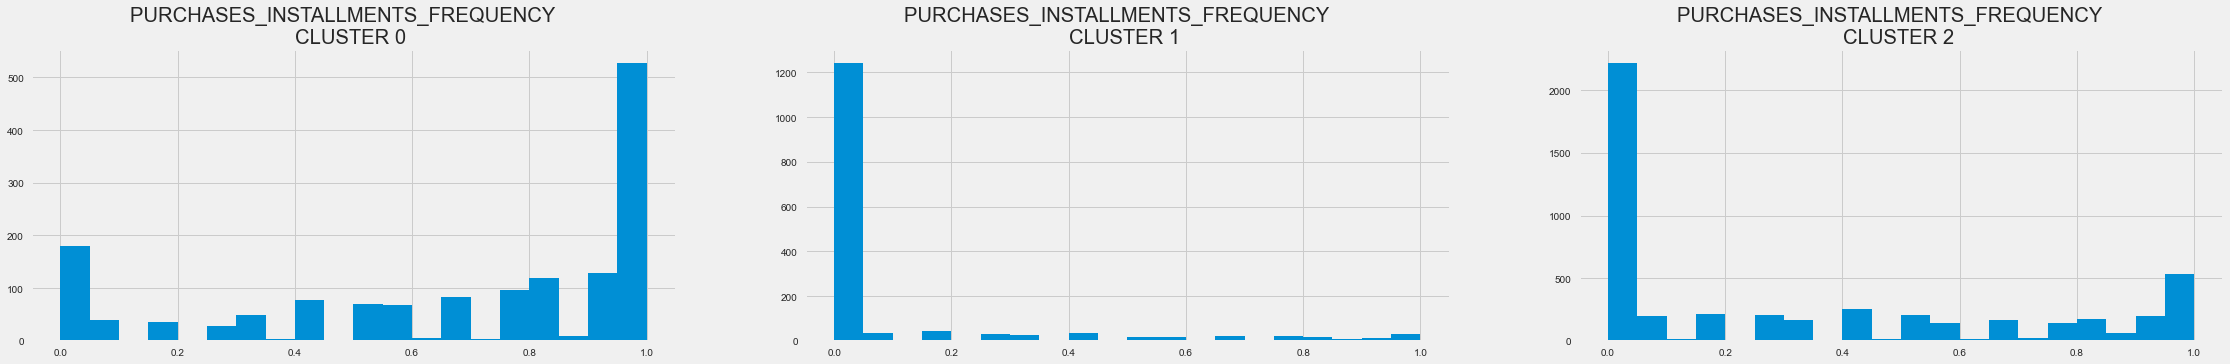

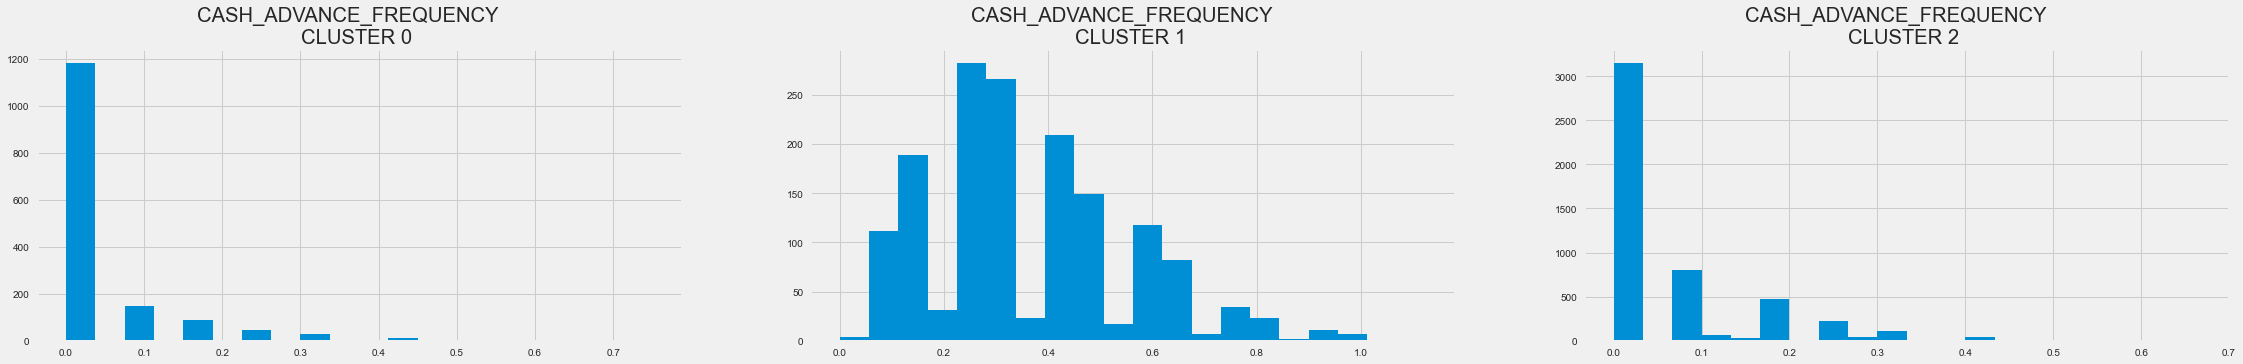

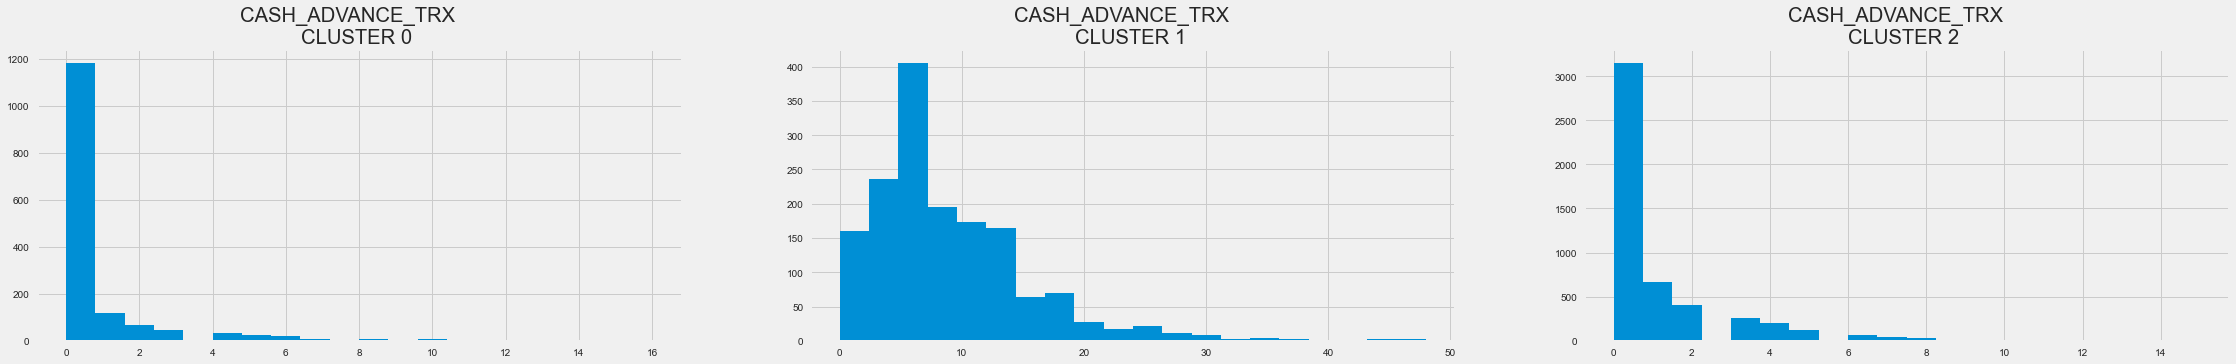

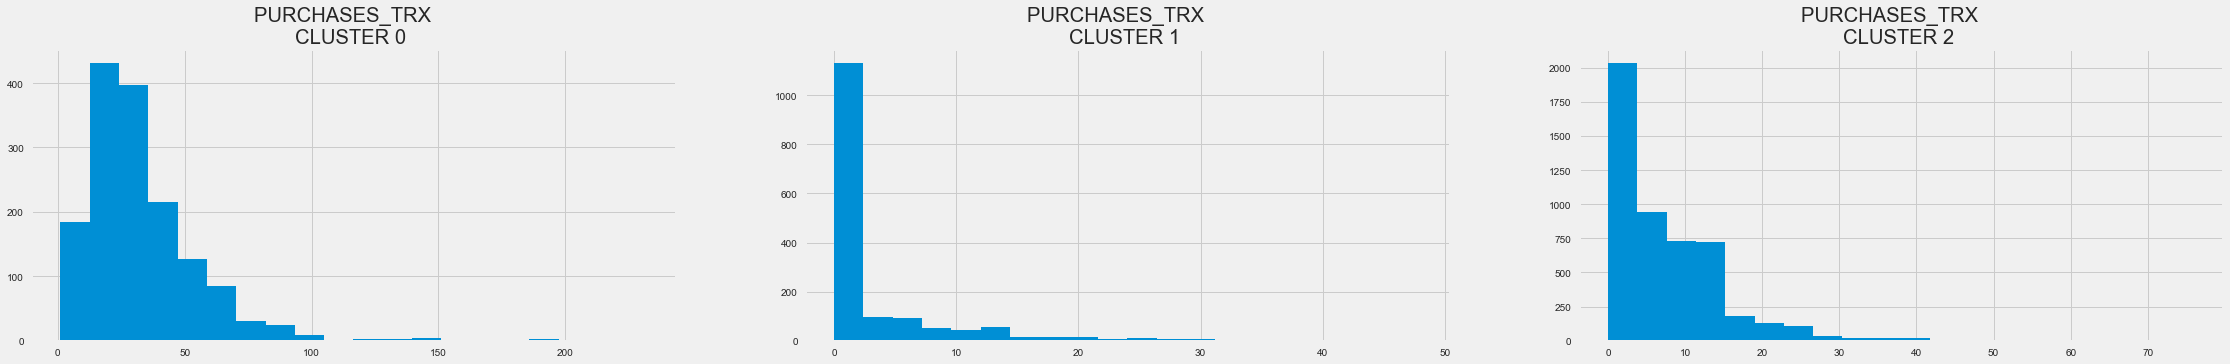

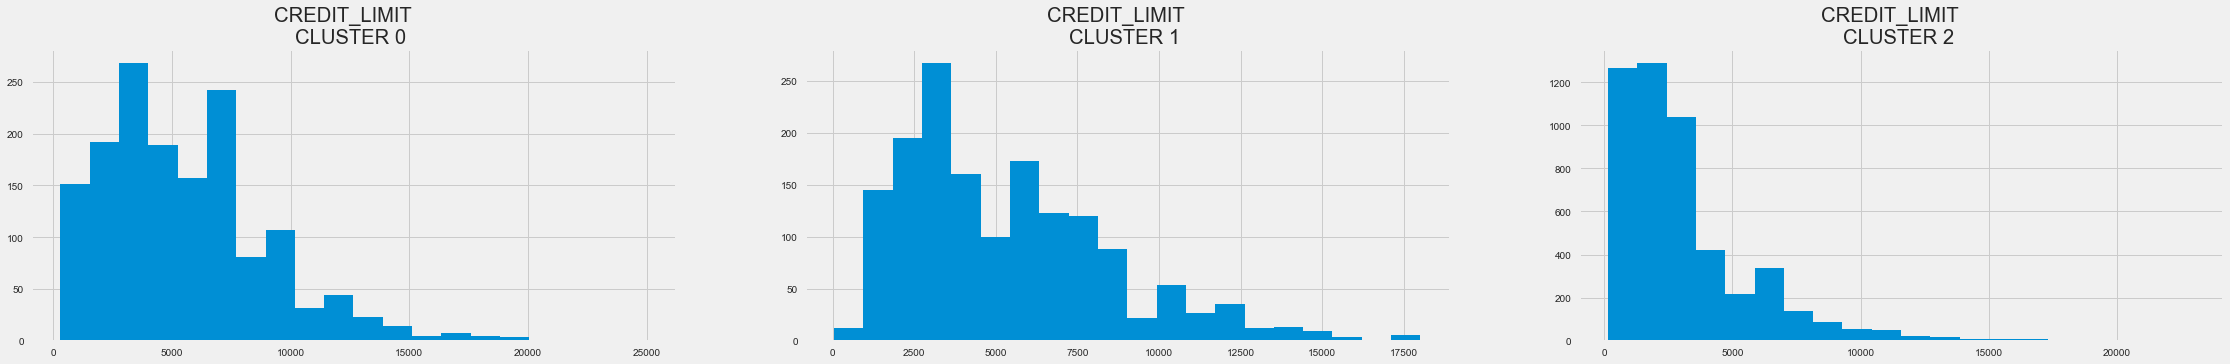

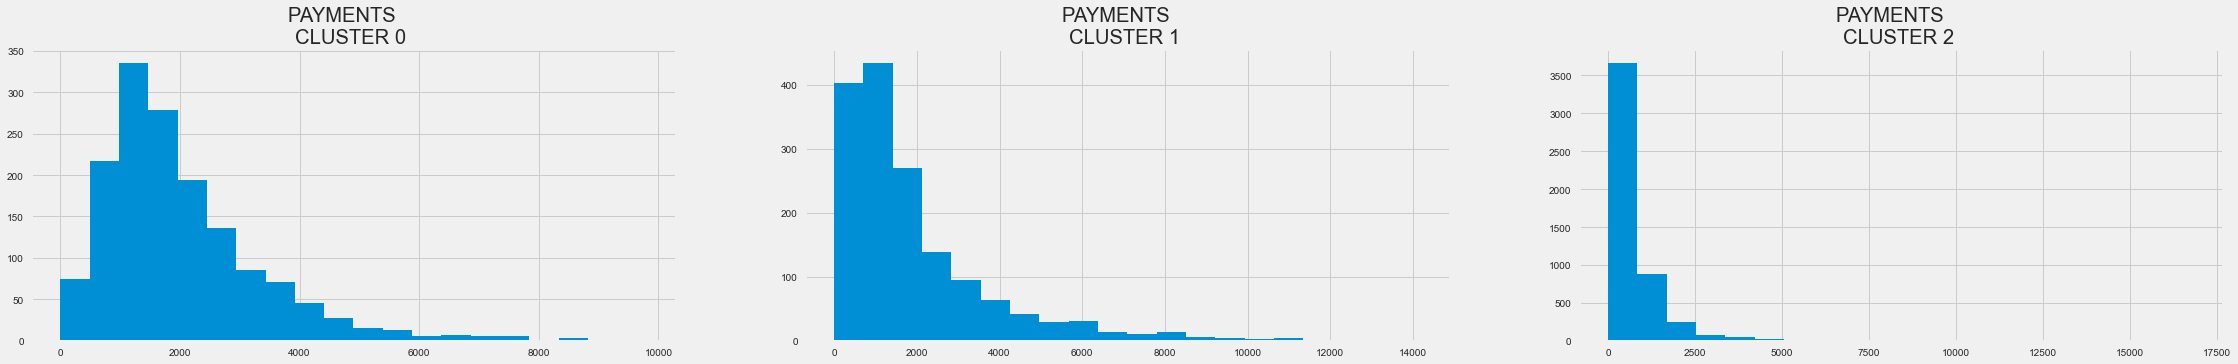

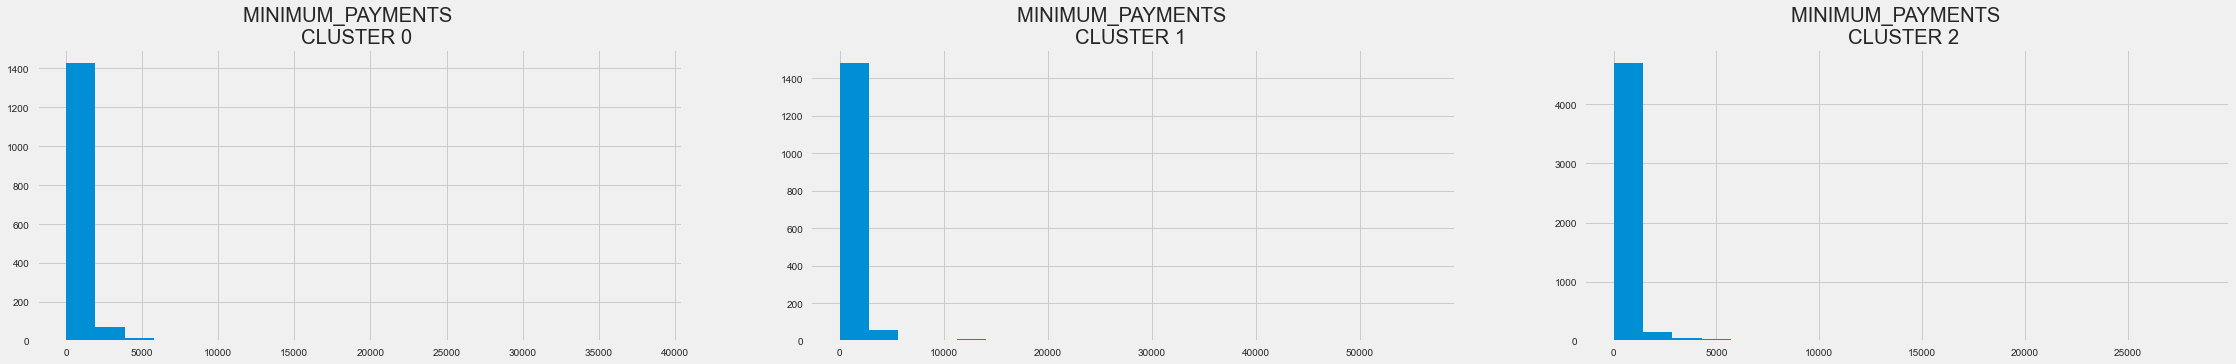

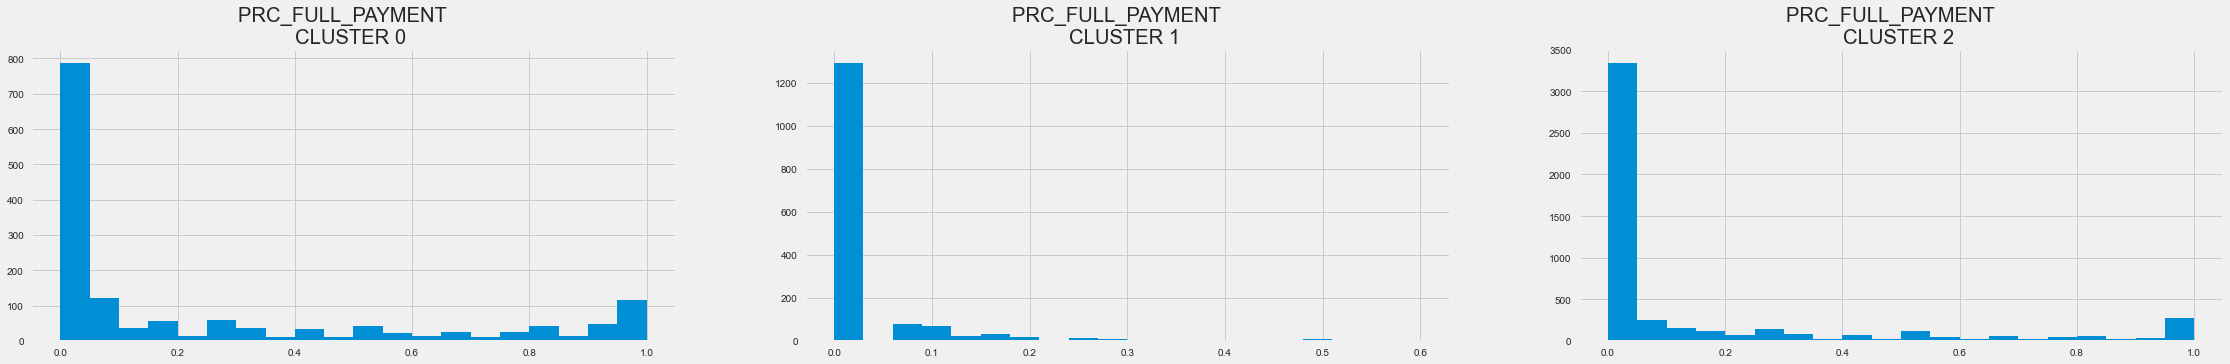

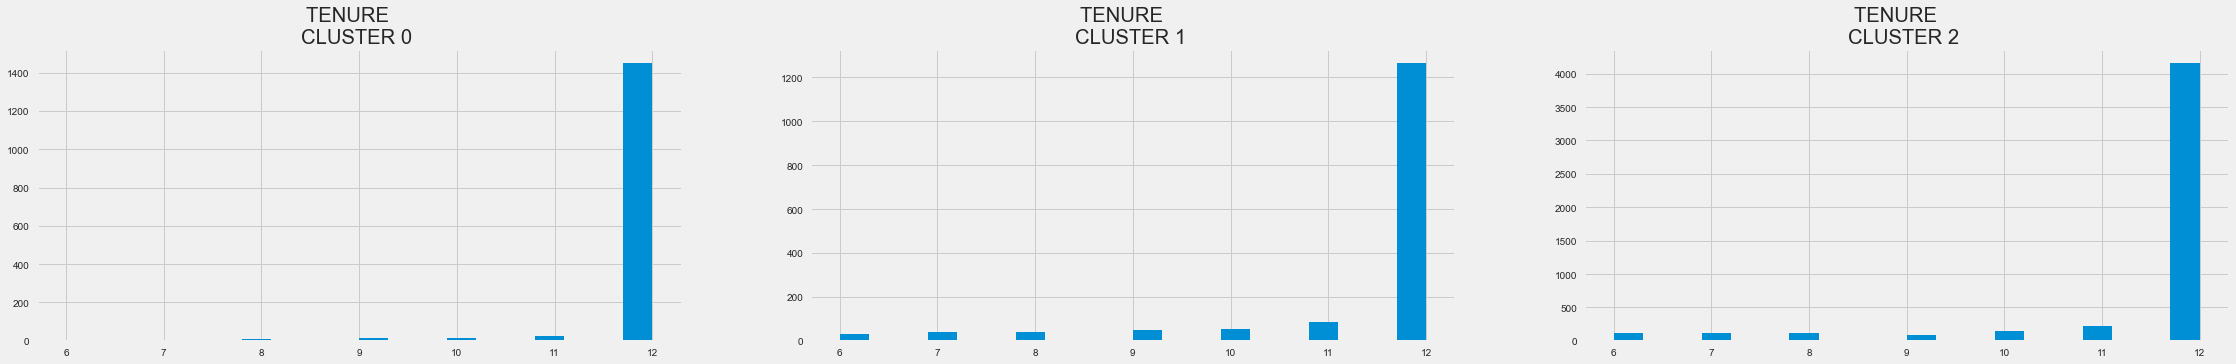

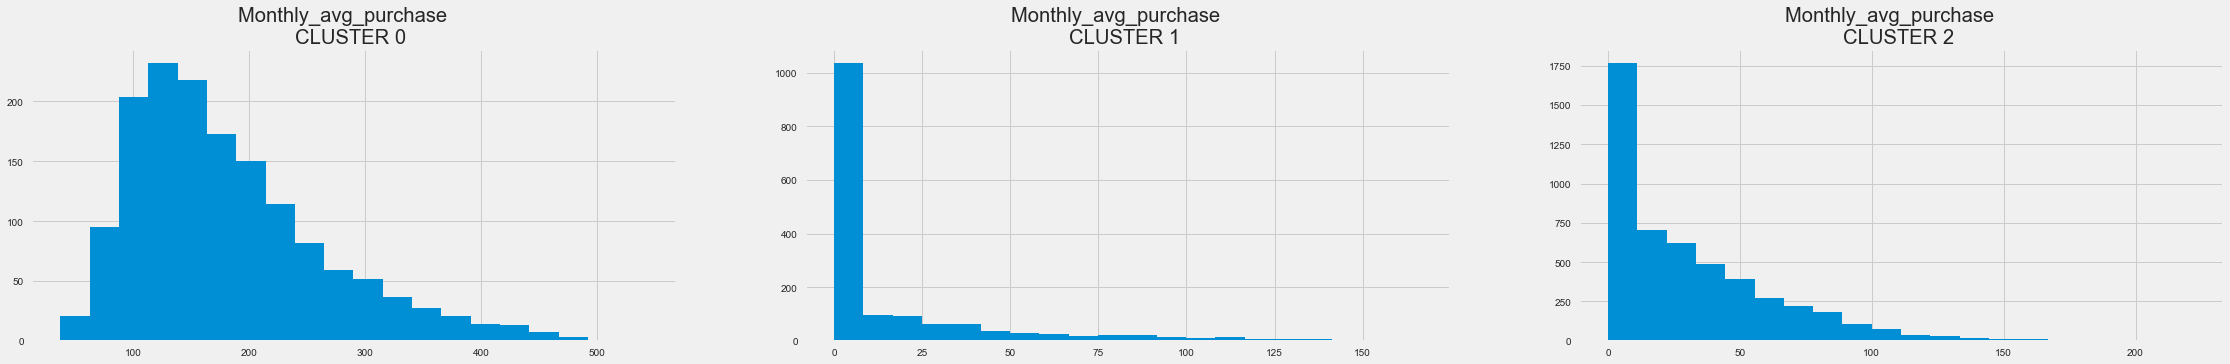

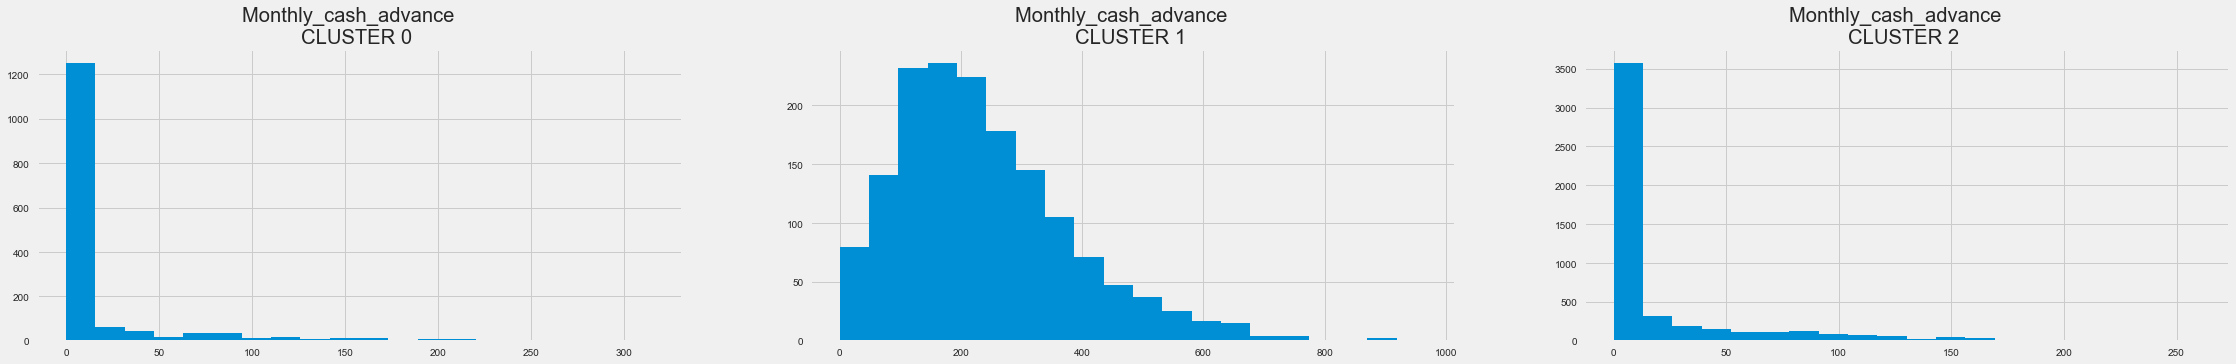

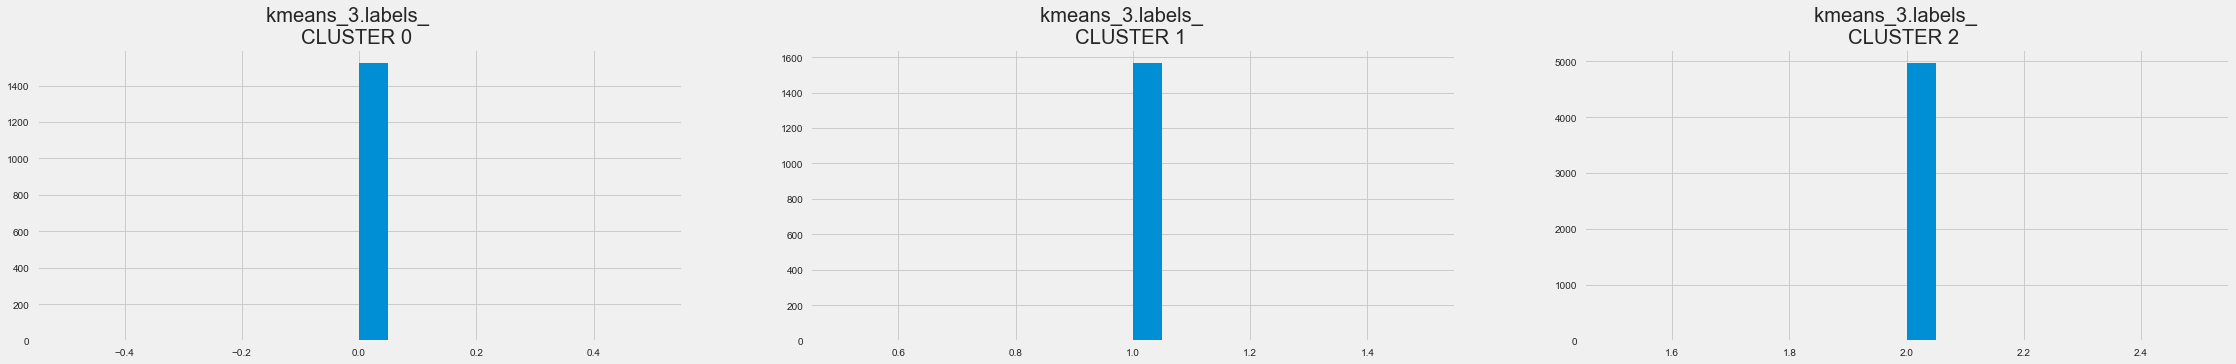

In [81]:
# Plot the histogram of various clusters
for i in df1.columns:
    plt.figure(figsize = (35, 5))
    for j in range(3):
        plt.subplot(1,3,j+1)
        ax = df1[df1['kmeans_3.labels_'] == j]
        ax[i].hist(bins=20)
        plt.title('{}    \nCLUSTER {} '.format(i,j))
         
plt.show()

###  DBSCAN clustering algorithm
 DBSCAN stands for density-based spatial clustering of applications with noise. It's a density-based clustering algorithm.
It is able to find irregular-shaped clusters. It separates regions by areas of low-density so it can also detect outliers really well. This algorithm is better than k-means when it comes to working with oddly shaped data.

In [82]:
df_DBScan = scaled_df.copy()

In [83]:
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=8)
    dbscan.fit(scaled_df)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

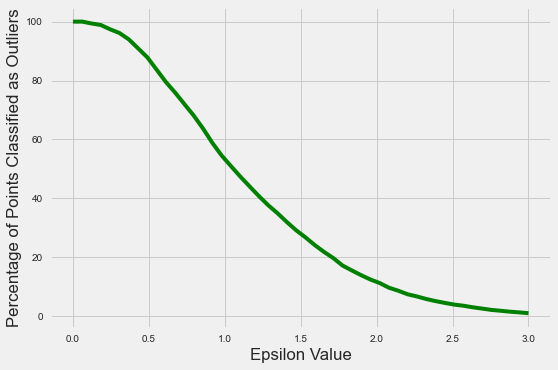

In [84]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

In [85]:
Eps=[]
Min_samples=[]
num_clusters = []
best_n_clusters = 2
max_sil = 0
for i in  range(2,21):
    for j in  range(1,5):
        model_db = DBSCAN(eps=j, min_samples = i, metric='euclidean')
        model_db.fit(df_DBScan)
        labels = model_db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        num_clusters.append(n_clusters_)
        Min_samples.append(i)
        Eps.append(j)
    
        score = silhouette_score(df_DBScan,  model_db.labels_)
        silhouette_coefficients.append(score)
        if (score > max_sil) and (n_clusters_>=2):
            max_sil = score
            best_n_clusters = n_clusters_ 
            min_sample = i
            eps = j

In [86]:
eps,min_sample,best_n_clusters,max_sil

(4, 2, 2, 0.5735402370328901)

In [87]:
dbscan = DBSCAN(eps=4,min_samples=2)
y_DBScan= dbscan.fit_predict(df_DBScan)

In [88]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
# Checking number of items in clusters and creating 'Cluster' column
df_DBScan['Cluster'] = y_DBScan
df_DBScan['Cluster'].value_counts()

 0    8044
-1       8
 1       2
Name: Cluster, dtype: int64

In [90]:
df_DBScan

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.763442          -0.215833  -0.628782         -0.537957   
1     1.172634           0.157625  -0.734956         -0.537957   
2     0.739487           0.531084   0.125525          0.630504   
3     0.232145          -0.962751   0.933319          1.727421   
4    -0.287738           0.531084  -0.717149         -0.513777   
...        ...                ...        ...               ...   
8049 -0.669950          -0.153592   0.392137          0.992541   
8050 -0.771040           0.531084  -0.410961         -0.537957   
8051 -0.776742           0.531084  -0.401078         -0.537957   
8052 -0.774160          -0.153592  -0.574249         -0.537957   
8053 -0.780248          -0.153592  -0.734956         -0.537957   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.412853     -0.541684            -0.758091   
1                  -0.601066      4.535574            -1.177415   
2                  -0.601066     -0.541684             1.338524   
3                  -0.601066     -0.379517            -0.967754   
4                  -0.601066     -0.541684            -0.967754   
...                      ...           ...                  ...   
8049               -0.601066     -0.541684            -0.338769   
8050               -0.026721     -0.541684             1.338524   
8051               -0.009202     -0.541684             1.338524   
8052               -0.316182     -0.541684             0.919200   
8053               -0.601066     -0.512875            -1.177415   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.634516                         -0.675452   
1                      -0.634516                         -0.888153   
2                       3.039187                         -0.888153   
3                      -0.328375                         -0.888153   
4                      -0.328375                         -0.888153   
...                          ...                               ...   
8049                    0.590051                         -0.888153   
8050                   -0.634516                          1.238857   
8051                   -0.634516                          1.238857   
8052                   -0.634516                          0.813457   
8053                   -0.634516                         -0.888153   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.670217         -0.545267      -0.585719     -0.960937   
1                   0.780895          0.339508      -0.712226      0.962911   
2                  -0.670217         -0.545267       0.046816      1.123232   
3                  -0.186515         -0.324073      -0.648972      1.123232   
4                  -0.670217         -0.545267      -0.648972     -0.896809   
...                      ...               ...            ...           ...   
8049               -0.670217         -0.545267      -0.585719      0.000987   
8050               -0.670217         -0.545267      -0.332705     -0.960937   
8051               -0.670217         -0.545267      -0.332705     -0.960937   
8052               -0.670217         -0.545267      -0.395958     -0.960937   
8053                0.297193         -0.102880      -0.712226     -1.121258   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  \
0    -0.732082         -0.310623         -0.511843  0.351403   
1     2.108427          0.214158          0.278097  0.351403   
2    -0.426085         -0.036216         -0.511843  0.351403   
3    -0.879016         -0.389107         -0.511843  0.351403   
4    -0.385116         -0.251395         -0.511843  0.351403   
...        ...               ...               ...       ...   
8049 -0.879016         -0.389107         -0.511843 -4.359050   
8050 -0.641948         -0.361605          1.265524 -4.359050   
8051 -0.678159         -0.233916         -0

In [91]:
# Instantiate the DBSCAN for 2 clusters
dbscan = DBSCAN(eps=4,min_samples=2)
# Fit the DBSCAN model
dbscan.fit_predict(df_DBScan)
# Calculate Silhoutte Score
score = silhouette_score(scaled_features, dbscan.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.574


In [92]:
describe_clusters2 = scaled_df.groupby(df_DBScan['Cluster']).mean()
describe_clusters2

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                             
-1       1.313855           0.484402   0.433062         -0.247332   
 0      -0.001837          -0.000614  -0.000832          0.000326   
 1       2.133021           0.531084   1.615025         -0.320010   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
-1                     1.090080      0.193763             0.509408   
 0                    -0.001900     -0.000058            -0.000839   
 1                     3.280222     -0.541684             1.338524   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
-1                        -0.314459                          0.707106   
 0                         0.000318                         -0.001117   
 1                        -0.022233                          1.664261   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster                                                            
-1                    -0.307439         -0.075230       4.031783   
 0                     0.000472          0.000210      -0.006892   
 1                    -0.670217         -0.545267      11.590571   

         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  \
Cluster                                                                         
-1           0.073131  0.387720         14.374219         -0.067501  0.253268   
 0          -0.000232 -0.000598         -0.014422          0.000194 -0.000339   
 1           0.642270  0.854204          0.508433         -0.511843  0.351403   

         Monthly_avg_purchase  Monthly_cash_advance  
Cluster                                              
-1                   0.421101              0.144864  
 0                  -0.000809             -0.000010  
 1                   1.568053             -0.540055

### Gaussian Mixture Models (GMM) 
A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means, but because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments.

The Gaussian mixture model uses multiple Gaussian distributions to fit arbitrarily shaped data.

There are several single Gaussian models that act as hidden layers in this hybrid model. So the model calculates the probability that a data point belongs to a specific Gaussian distribution and that's the cluster it will fall under.

In [93]:
df_GMM = scaled_df.copy()

In [94]:
def evaluate_metrics(df1,min_n_components=2, max_n_components=11, rand_state=1):

    silhouette = []
    ch_score = []
    db_score = []
    for k in range(min_n_components, max_n_components):#this range is optional
          
        gmm = GaussianMixture(n_components=k, random_state=1 )   #each gaussian in your mixture is one component 
        y_GMM = gmm.fit_predict(df_GMM)
   
        silhouette.append(silhouette_score(scaled_features, y_GMM))
        ch_score.append(calinski_harabasz_score(scaled_features, y_GMM))
        db_score.append(davies_bouldin_score(scaled_features, y_GMM))        

    
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    ax[0][0].plot(range(min_n_components, max_n_components), silhouette, '--', linewidth=2)
    ax[0][0].set_xlabel('#. of clusters')
    ax[0][0].set_ylabel('Silhouette Score')
    
    ax[0][1].plot(range(min_n_components, max_n_components), ch_score, '--', linewidth=2)
    ax[0][1].set_xlabel('#. of clusters')
    ax[0][1].set_ylabel('Calinski Harabasz Score')
    
    ax[1][0].plot(range(min_n_components, max_n_components), db_score, '--', linewidth=2)
    ax[1][0].set_xlabel('#. of clusters')
    ax[1][0].set_ylabel('Davies Bouldin Score')
    fig.suptitle('Metrics to evaluate the number of clusters')
    plt.show()

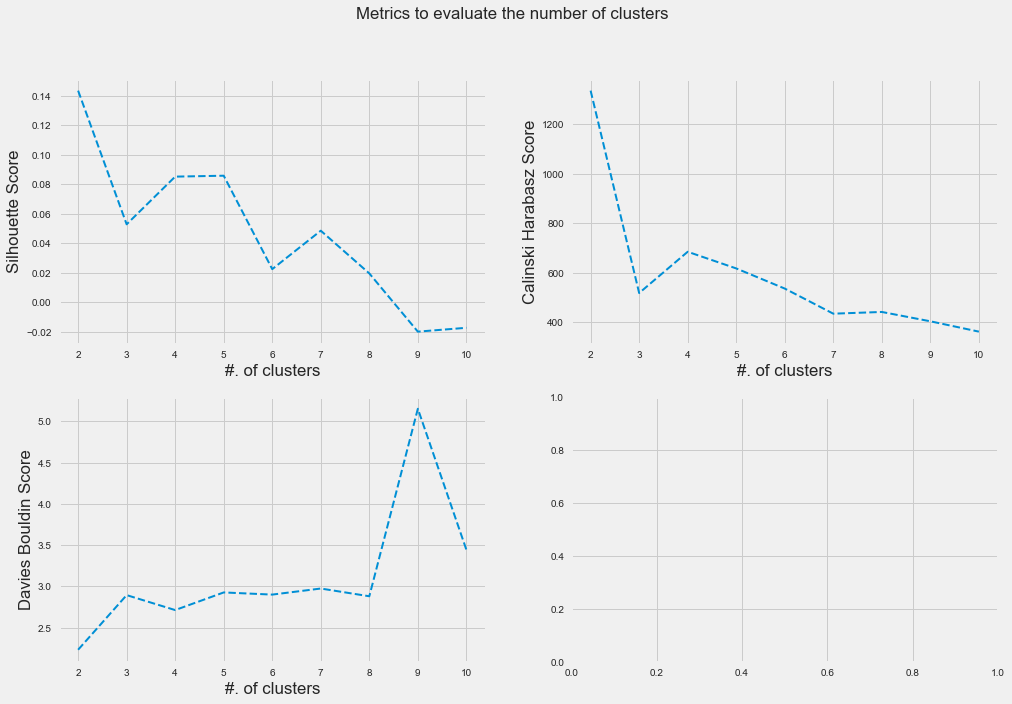

In [95]:
evaluate_metrics(scaled_features, min_n_components=2, max_n_components=11, rand_state=1)

In [96]:
gmm = GaussianMixture(n_components=2)
y_GMM = gmm.fit_predict(df_GMM)

In [97]:
# Checking number of items in clusters and creating 'Cluster' column
df_GMM['Cluster'] = y_GMM
df_GMM['Cluster'].value_counts()

1    4222
0    3832
Name: Cluster, dtype: int64

In [98]:
# Instantiate the GMM for 2 clusters
gmm = GaussianMixture(n_components=2)
# Fit the GMM model
gmm.fit_predict(df_GMM)
# Calculate Silhoutte Score
score = silhouette_score(scaled_features, y_GMM, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.143


In [99]:
describe_clusters3 = scaled_df.groupby(df_GMM['Cluster']).mean()
describe_clusters3

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                             
0        0.458530           0.193332  -0.321165         -0.216415   
1       -0.416174          -0.175474   0.291498          0.196424   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     -0.287259      0.596729            -0.504145   
1                      0.260724     -0.541607             0.457576   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                         -0.232185                         -0.408160   
1                          0.210738                          0.370457   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster                                                            
0                      0.737797          0.600415      -0.295928   
1                     -0.669644         -0.544953       0.268592   

         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  \
Cluster                                                                         
0           -0.025585  0.153043          0.229538         -0.369204 -0.062032   
1            0.023222 -0.138906         -0.208335          0.335099  0.056302   

         Monthly_avg_purchase  Monthly_cash_advance  
Cluster                                              
0                   -0.323943              0.594940  
1                    0.294019             -0.539984

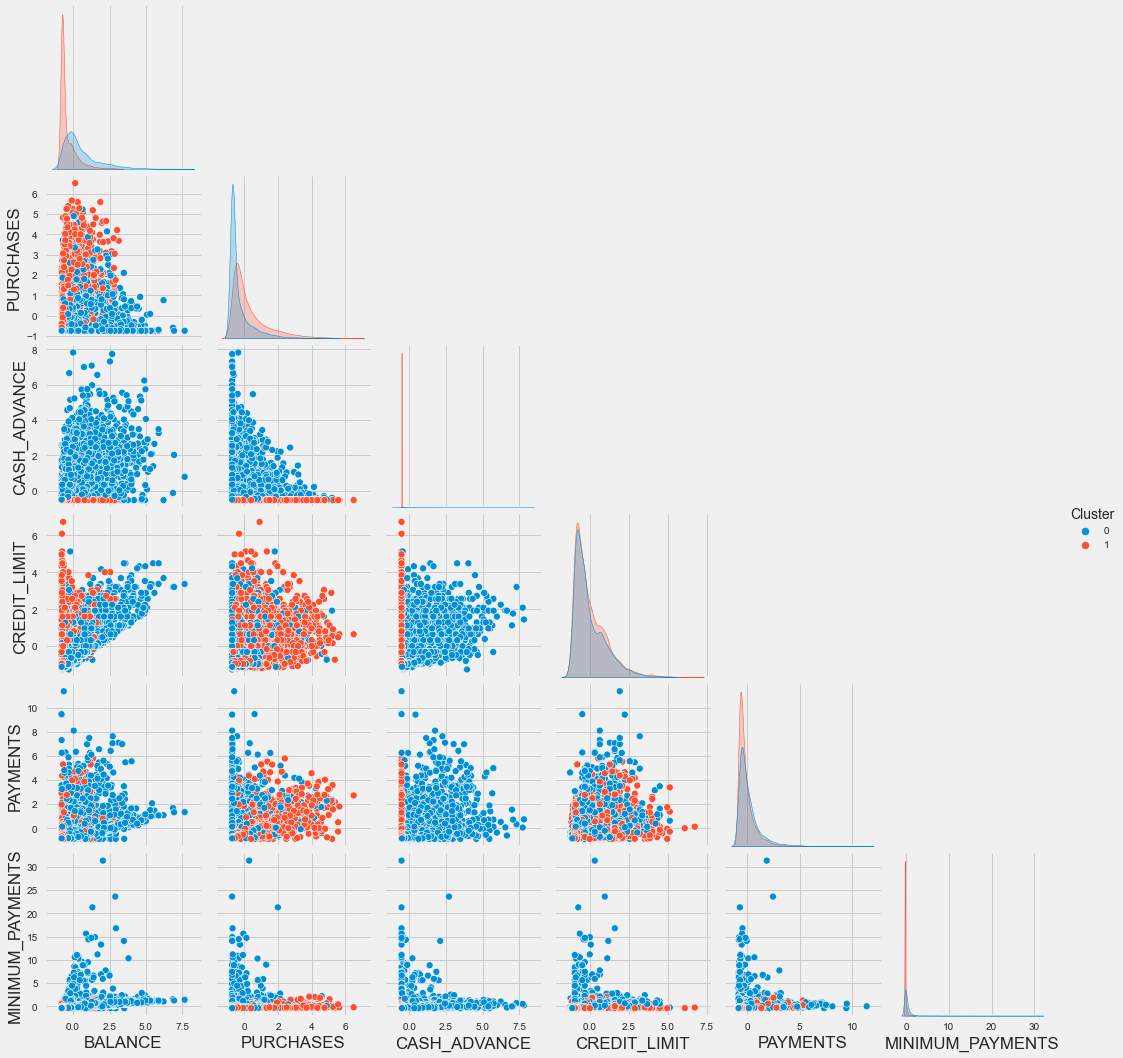

In [100]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS",'Cluster']
sns.pairplot(df_GMM[ best_cols ], hue="Cluster",corner=True)

-----